# ANALISIS DE DATOS DE POSIBLES CLIENTES DE SEGUROS DE CARAVANAS

El objetivo inicial del anásilis es conseguir identificar aquellos potenciales clientes que contrataran un seguro de caravana.

## ANALISIS DE LAS VARIABLES

Para la realización del estudio utilizaremos los siguientes paquetes:

In [1]:
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Cargamos el dataset desde su fuente original en formato csv:

In [2]:
df = pd.read_csv('./ticdata2000.txt', sep="\t")
#Asignamos nombre a las columnas
df.columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV',
              'MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND','MFWEKIND',
              'MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBER','MBERMIDD',
              'MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP',
              'MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512',
              'MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT',
              'PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG',
              'PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
              'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM',
              'ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED',
              'ABYSTAND','CARAVAN']
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


El  dataset esta formado por 86 variables y alrededor de 6.000 registros. las variables se pueden separar en las siguientes categorias:
 - factores sociodemograficos (atributos 1-43) agrupados por el codigo postal. Todos los clientes que viven en el mismo codigo postal tienen lso mismos valores en las variables socioeconomicas.
 - producto propietario (atributos 44-86)
 
La lista de variables del dataset es:

Nr Name     Description 
- 1  MOSTYPE  Customer Subtype see L0
- 2  MAANTHUI Number of houses (1 - 10)
- 3  MGEMOMV  Avg size household (1 - 6)
- 4  MGEMLEEF Avg age see L1
- 5  MOSHOOFD Customer main type see L2
- 6  MGODRK   Roman catholic see L3
- 7  MGODPR   Protestant ...
- 8  MGODOV   Other religion
- 9  MGODGE   No religion
- 10 MRELGE   Married
- 11 MRELSA   Living together
- 12 MRELOV   Other relation
- 13 MFALLEEN Singles
- 14 MFGEKIND Household without children
- 15 MFWEKIND Household with children
- 16 MOPLHOOG High level education
- 17 MOPLMIDD Medium level education
- 18 MOPLLAAG Lower level education
- 19 MBERHOOG High status
- 20 MBERZELF Entrepreneur
- 21 MBERBOER Farmer
- 22 MBERMIDD Middle management
- 23 MBERARBG Skilled labourers
- 24 MBERARBO Unskilled labourers
- 25 MSKA     Social class A
- 26 MSKB1    Social class B1
- 27 MSKB2    Social class B2
- 28 MSKC     Social class C
- 29 MSKD     Social class D
- 30 MHHUUR   Rented house
- 31 MHKOOP   Home owners
- 32 MAUT1    1 car
- 33 MAUT2    2 cars
- 34 MAUT0    No car
- 35 MZFONDS  National Health Service
- 36 MZPART   Private health insurance
- 37 MINKM30  Income < 30.000
- 38 MINK3045 Income 30-45.000
- 39 MINK4575 Income 45-75.000
- 40 MINK7512 Income 75-122.000
- 41 MINK123M Income >123.000
- 42 MINKGEM  Average income
- 43 MKOOPKLA Purchasing power class
- 44 PWAPART  Contribution private third party insurance see L4
- 45 PWABEDR  Contribution third party insurance (firms) ...
- 46 PWALAND  Contribution third party insurane (agriculture)
- 47 PPERSAUT Contribution car policies
- 48 PBESAUT  Contribution delivery van policies
- 49 PMOTSCO  Contribution motorcycle/scooter policies
- 50 PVRAAUT  Contribution lorry policies
- 51 PAANHANG Contribution trailer policies
- 52 PTRACTOR Contribution tractor policies
- 53 PWERKT   Contribution agricultural machines policies 
- 54 PBROM    Contribution moped policies
- 55 PLEVEN   Contribution life insurances
- 56 PPERSONG Contribution private accident insurance policies
- 57 PGEZONG  Contribution family accidents insurance policies
- 58 PWAOREG  Contribution disability insurance policies
- 59 PBRAND   Contribution fire policies
- 60 PZEILPL  Contribution surfboard policies
- 61 PPLEZIER Contribution boat policies
- 62 PFIETS   Contribution bicycle policies
- 63 PINBOED  Contribution property insurance policies
- 64 PBYSTAND Contribution social security insurance policies
- 65 AWAPART  Number of private third party insurance 1 - 12
- 66 AWABEDR  Number of third party insurance (firms) ...
- 67 AWALAND  Number of third party insurane (agriculture)
- 68 APERSAUT Number of car policies
- 69 ABESAUT  Number of delivery van policies
- 70 AMOTSCO  Number of motorcycle/scooter policies
- 71 AVRAAUT  Number of lorry policies
- 72 AAANHANG Number of trailer policies
- 73 ATRACTOR Number of tractor policies
- 74 AWERKT   Number of agricultural machines policies
- 75 ABROM    Number of moped policies
- 76 ALEVEN   Number of life insurances
- 77 APERSONG Number of private accident insurance policies
- 78 AGEZONG  Number of family accidents insurance policies
- 79 AWAOREG  Number of disability insurance policies
- 80 ABRAND   Number of fire policies
- 81 AZEILPL  Number of surfboard policies
- 82 APLEZIER Number of boat policies
- 83 AFIETS   Number of bicycle policies
- 84 AINBOED  Number of property insurance policies
- 85 ABYSTAND Number of social security insurance policies
- 86 CARAVAN  Number of mobile home policies 0 - 1
 
La varible respuesta es el atributo 86, "CARAVAN:Number of mobile home policies" la cual indica si ha contratado la poliza o no. Siendo 0 cuando no la contrata y 1 cuando lo hace.


El estudio se centrará en la generación de un modelo que nos permita identificar los potenciales clientes de seguros de caravanas.



Como primera manupulacion sobre los datos, se sabe que alguna de las variables esta recodificada, con el fin de que los datos sean numericos. Estas variables son:

- 1 MOSTYPE Customer Subtype see L0
- 4 MGEMLEEF Avg age see L1
- 5 MOSHOOFD Customer main type see L2
- 6 MGODRK Roman catholic see L3

Las siguientes variable se mapean con el tipo L4

- 44 PWAPART Contribution private third party insurance 
- 45 PWABEDR	Contribution third party insurance (firms) ...
- 46 PWALAND	Contribution third party insurane (agriculture)
- 47 PPERSAUT	Contribution car policies
- 48 PBESAUT	Contribution delivery van policies
- 49 PMOTSCO	Contribution motorcycle/scooter policies
- 50 PVRAAUT	Contribution lorry policies
- 51 PAANHANG	Contribution trailer policies
- 52 PTRACTOR	Contribution tractor policies
- 53 PWERKT	Contribution agricultural machines policies
- 54 PBROM	Contribution moped policies
- 55 PLEVEN	Contribution life insurances
- 56 PPERSONG	Contribution private accident insurance policies
- 57 PGEZONG	Contribution family accidents insurance policies
- 58 PWAOREG	Contribution disability insurance policies
- 59 PBRAND	Contribution fire policies
- 60 PZEILPL	Contribution surfboard policies
- 61 PPLEZIER	Contribution boat policies
- 62 PFIETS	Contribution bicycle policies
- 63 PINBOED	Contribution property insurance policies
- 64 PBYSTAND	Contribution social security insurance policies


Las cuales se basan en la siguiente categorización:


L0:

Value Label
- 1 High Income, expensive child
- 2 Very Important Provincials
- 3 High status seniors
- 4 Affluent senior apartments
- 5 Mixed seniors
- 6 Career and childcare
- 7 Dinki's (double income no kids)
- 8 Middle class families
- 9 Modern, complete families
- 10 Stable family
- 11 Family starters
- 12 Affluent young families
- 13 Young all american family
- 14 Junior cosmopolitan
- 15 Senior cosmopolitans
- 16 Students in apartments
- 17 Fresh masters in the city
- 18 Single youth
- 19 Suburban youth
- 20 Etnically diverse
- 21 Young urban have-nots
- 22 Mixed apartment dwellers
- 23 Young and rising
- 24 Young, low educated 
- 25 Young seniors in the city
- 26 Own home elderly
- 27 Seniors in apartments
- 28 Residential elderly
- 29 Porchless seniors: no front yard
- 30 Religious elderly singles
- 31 Low income catholics
- 32 Mixed seniors
- 33 Lower class large families
- 34 Large family, employed child
- 35 Village families
- 36 Couples with teens 'Married with children'
- 37 Mixed small town dwellers
- 38 Traditional families
- 39 Large religous families
- 40 Large family farms
- 41 Mixed rurals


L1:

- 1 20-30 years
- 2 30-40 years
- 3 40-50 years
- 4 50-60 years
- 5 60-70 years
- 6 70-80 years


L2:

- 1 Successful hedonists
- 2 Driven Growers
- 3 Average Family
- 4 Career Loners
- 5 Living well
- 6 Cruising Seniors
- 7 Retired and Religeous
- 8 Family with grown ups
- 9 Conservative families
- 10 Farmers


L3:

- 0 0%
- 1 1 - 10%
- 2 11 - 23%
- 3 24 - 36%
- 4 37 - 49%
- 5 50 - 62%
- 6 63 - 75%
- 7 76 - 88%
- 8 89 - 99%
- 9 100%

L4:

- 0  0
- 1  1 - 49
- 2  50 - 99
- 3  100 - 199
- 4  200 - 499
- 5  500 - 999
- 6  1000 - 4999
- 7  5000 - 9999
- 8  10.000 - 19.999
- 9  20.000 - ?



Se identifican un conjunto de variables cuyos valores no estan asociados a la muestra concreta, sino que es una estimacion socio-economica en base al zipcode donde reside la muestra.

Estas variables en caso de estar basados en la muestra deberian ser dicotomicas y como observaremos mas adelante, estan tomando multiples valores. Estos es como ya se 
ha comentado a un valor socio-economico, basado en la zona de residencia de la muestra.

Se decide prescindir de todas las variables socio-economicas, menos de la variable MKOOPKLA (Purchasing power class) y MINKGEM (Average income), la cual nos proporciona informacion de la capacidad economica de la zona de residencia.


Nr Name     Description 
- 1  MOSTYPE  Customer Subtype see L0
- 2  MAANTHUI Number of houses (1 - 10)
- 3  MGEMOMV  Avg size household (1 - 6)
- 4  MGEMLEEF Avg age see L1
- 5  MOSHOOFD Customer main type see L2
- 6  MGODRK   Roman catholic see L3
- 7  MGODPR   Protestant ...
- 8  MGODOV   Other religion
- 9  MGODGE   No religion
- 10 MRELGE   Married
- 11 MRELSA   Living together
- 12 MRELOV   Other relation
- 13 MFALLEEN Singles
- 14 MFGEKIND Household without children
- 15 MFWEKIND Household with children
- 16 MOPLHOOG High level education
- 17 MOPLMIDD Medium level education
- 18 MOPLLAAG Lower level education
- 19 MBERHOOG High status
- 20 MBERZELF Entrepreneur
- 21 MBERBOER Farmer
- 22 MBERMIDD Middle management
- 23 MBERARBG Skilled labourers
- 24 MBERARBO Unskilled labourers
- 25 MSKA     Social class A
- 26 MSKB1    Social class B1
- 27 MSKB2    Social class B2
- 28 MSKC     Social class C
- 29 MSKD     Social class D
- 30 MHHUUR   Rented house
- 31 MHKOOP   Home owners
- 32 MAUT1    1 car
- 33 MAUT2    2 cars
- 34 MAUT0    No car
- 35 MZFONDS  National Health Service
- 36 MZPART   Private health insurance
- 37 MINKM30  Income < 30.000
- 38 MINK3045 Income 30-45.000
- 39 MINK4575 Income 45-75.000
- 40 MINK7512 Income 75-122.000
- 41 MINK123M Income >123.000


In [3]:
y = df['CARAVAN']

In [4]:
df2 = df.loc[:, df.columns != 'CARAVAN']

In [5]:
df2 = df2[['MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR',
'PWERKT','PBROM','PLEVEN', 'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM',
'ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND']]



## Identificacion de posibles correlaciones entre las variables

In [6]:
df_corr = df2.corr()
df_corr

,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
MKOOPKLA,1.000000,0.012215,0.026651,-0.015673,0.022555,0.008632,0.011704,-0.005946,-0.016026,-0.012261,...,0.053858,-0.009792,0.031904,0.016165,0.023995,-0.006445,0.019636,0.041084,0.013367,0.064468
PWAPART,0.012215,1.000000,-0.038389,-0.109893,0.154540,-0.041049,0.019293,-0.022278,-0.026188,-0.074789,...,0.133865,-0.009621,0.057176,-0.001905,0.516632,0.013315,-0.002179,-0.002272,0.044620,0.046281
PWABEDR,0.026651,-0.038389,1.000000,0.022085,-0.008777,0.294854,-0.008902,0.154485,0.131628,0.065527,...,0.017753,-0.008074,-0.008945,0.207573,0.060822,-0.002506,-0.008128,-0.016622,0.021777,-0.001270
PWALAND,-0.015673,-0.109893,0.022085,1.000000,0.073918,0.023844,-0.008091,-0.005532,0.087639,0.571676,...,0.002780,0.046169,0.018253,0.062441,0.132215,-0.003253,0.002076,-0.016693,0.002679,0.000158
PPERSAUT,0.022555,0.154540,-0.008777,0.073918,1.000000,0.014314,0.056718,0.007603,0.028369,0.077531,...,0.076985,0.007205,0.046104,-0.004713,0.018424,-0.007545,0.031728,-0.031652,0.012587,0.084532
PBESAUT,0.008632,-0.041049,0.294854,0.023844,0.014314,1.000000,0.031971,0.218487,0.138469,0.054675,...,0.048359,-0.006647,-0.007363,0.044681,0.003341,-0.002063,-0.006691,-0.004488,-0.007935,0.021539
PMOTSCO,0.011704,0.019293,-0.008902,-0.008091,0.056718,0.031971,1.000000,-0.007548,0.005945,-0.007151,...,0.031839,0.027790,-0.006334,0.003129,-0.018413,-0.004438,-0.000324,-0.011292,0.012558,0.024644
PVRAAUT,-0.005946,-0.022278,0.154485,-0.005532,0.007603,0.218487,-0.007548,1.000000,0.134813,0.063926,...,-0.007835,-0.002825,-0.003130,0.052112,-0.004190,-0.000877,-0.002844,0.014151,-0.003373,-0.004588
PAANHANG,-0.016026,-0.026188,0.131628,0.087639,0.028369,0.138469,0.005945,0.134813,1.000000,0.082624,...,-0.000740,0.014983,0.002043,0.046261,0.033692,0.068924,0.032314,-0.007183,0.027102,-0.011705
PTRACTOR,-0.012261,-0.074789,0.065527,0.571676,0.077531,0.054675,-0.007151,0.063926,0.082624,1.000000,...,-0.010027,0.055303,0.022928,0.079126,0.107307,-0.003486,-0.000839,-0.012323,-0.003963,0.022115


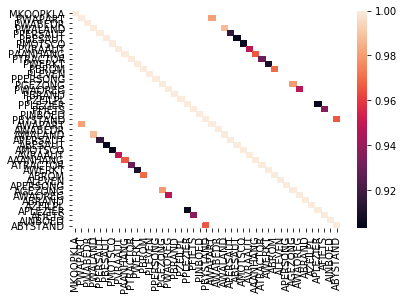

In [7]:

df_filtered = df_corr[ df_corr[:] > 0.9]
sns.heatmap(df_filtered, 
            xticklabels=df_filtered.columns.values,
            yticklabels=df_filtered.columns.values)

In [8]:
import pandas as pd

import scipy.stats as stats
import itertools

def pwise_corr_pvalues(df, method= None):   
    correlations = {}
    pvalues = {}
    length = {}
    columns = df.columns.tolist()
    
    if method == None:
        test = stats.pearsonr
        test_name = "Pearson"
    elif method == "spearman":
        test = stats.spearmanr
        test_name = "Spearman Rank"
    elif method == "kendall":
        test = stats.kendalltau
        test_name = "Kendall's Tau-b"
    
    
    for col1, col2 in itertools.combinations(columns, 2):
        sub = df[[col1,col2]].dropna(how= "any")
        correlations[col1 + " " + "&" + " " + col2] = format(test(sub.loc[:, col1], sub.loc[:, col2])[0], '.4f')
        pvalues[col1 + " " + "&" + " " + col2] = format(test(sub.loc[:, col1], sub.loc[:, col2])[1], '.4f')
        length[col1 + " " + "&" + " " + col2] = len(df[[col1,col2]].dropna(how= "any"))
        
    corrs = pd.DataFrame.from_dict(correlations, orient= "index")
    corrs.columns = ["r value"]                
    
    pvals = pd.DataFrame.from_dict(pvalues, orient= "index")
    pvals.columns = ["p-value"]
        
    l = pd.DataFrame.from_dict(length, orient= "index")
    l.columns = ["N"]
    
    results = corrs.join([pvals,l])
    
    return results

     

In [9]:
correlation = pwise_corr_pvalues(df2)   
correlation['r value'] = correlation['r value'].apply(pd.to_numeric)
correlation['r value'] > 0.9
correlation[correlation['r value'] > 0.8]

,r value,p-value,N
PWAPART & AWAPART,0.9814,0.0000,5822
PWABEDR & AWABEDR,0.8954,0.0000,5822
PWALAND & AWALAND,0.9876,0.0000,5822
PPERSAUT & APERSAUT,0.9162,0.0000,5822
PBESAUT & ABESAUT,0.9030,0.0000,5822
PMOTSCO & AMOTSCO,0.9049,0.0000,5822
PVRAAUT & AVRAAUT,0.9487,0.0000,5822
PAANHANG & AAANHANG,0.9661,0.0000,5822
PTRACTOR & ATRACTOR,0.9298,0.0000,5822
PWERKT & AWERKT,0.9097,0.0000,5822


Una de las variables de cada par de variables correladas, debe elimimnarse del juego de datos

In [10]:
df3 = df[['MKOOPKLA','AWAPART','AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM',
'ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']]



Correlacion con la variable respuesta

In [11]:
# Find correlations and sort
df3.corr()['CARAVAN'].sort_values()

ABROM      -0.045116
AWALAND    -0.021279
ATRACTOR   -0.017202
AWERKT     -0.012555
ABESAUT    -0.009176
AVRAAUT    -0.008963
APERSONG   -0.008492
AWABEDR    -0.000759
AMOTSCO     0.008589
AAANHANG    0.009428
AINBOED     0.018026
AWAOREG     0.022337
AZEILPL     0.026201
AGEZONG     0.033548
AFIETS      0.034144
ALEVEN      0.037118
ABRAND      0.061381
ABYSTAND    0.066658
AWAPART     0.089387
MKOOPKLA    0.095938
APLEZIER    0.105700
APERSAUT    0.144210
CARAVAN     1.000000
Name: CARAVAN, dtype: float64

In [12]:
most_correlated = df3.corr().abs()['CARAVAN'].sort_values(ascending=False)
    
#Sacamos los 10 valores con el máximo coeficiente de correlación
most_correlated = most_correlated[:10]
most_correlated

CARAVAN     1.000000
APERSAUT    0.144210
APLEZIER    0.105700
MKOOPKLA    0.095938
AWAPART     0.089387
ABYSTAND    0.066658
ABRAND      0.061381
ABROM       0.045116
ALEVEN      0.037118
AFIETS      0.034144
Name: CARAVAN, dtype: float64

In [13]:
df_analisis = df[['MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABYSTAND','ABROM','ALEVEN','ABRAND','APLEZIER','CARAVAN']]

In [14]:
y_analisis = df_analisis['CARAVAN']

In [15]:
df_analisis2 = df_analisis.loc[:, df_analisis.columns != 'CARAVAN']

# IDENTIFICACION VALORES FALTANTES




In [16]:
# Identificación los valores faltantes
df.isnull().any().any()

False

Como se puede observar no existen valores faltantes

# ANALISIS DE VARIABLES

El estudio de las variables se van a centrar en las siguiente variables:

- 43 MKOOPKLA Purchasing power class
- 68 APERSAUT Number of car policies
- 82 APLEZIER Number of boat policies
- 65 AWAPART  Number of private third party insurance 1 - 12
- 85 ABYSTAND Number of social security insurance policies
- 80 ABRAND   Number of fire policies
- 75 ABROM    Number of moped policies
- 76 ALEVEN   Number of life insurances
- 83 AFIETS   Number of bicycle policies

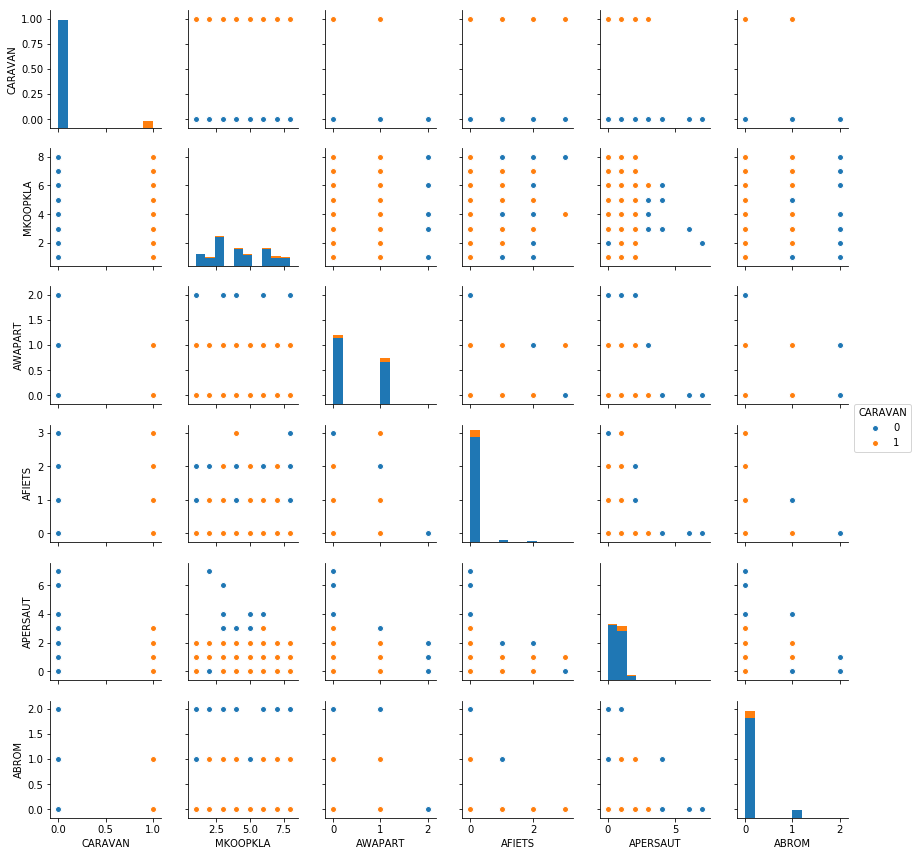

In [17]:

sns.pairplot(df_analisis, 
             vars = ['CARAVAN','MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABROM'], 
             hue = 'CARAVAN', diag_kind = 'hist', 
             size = 2);

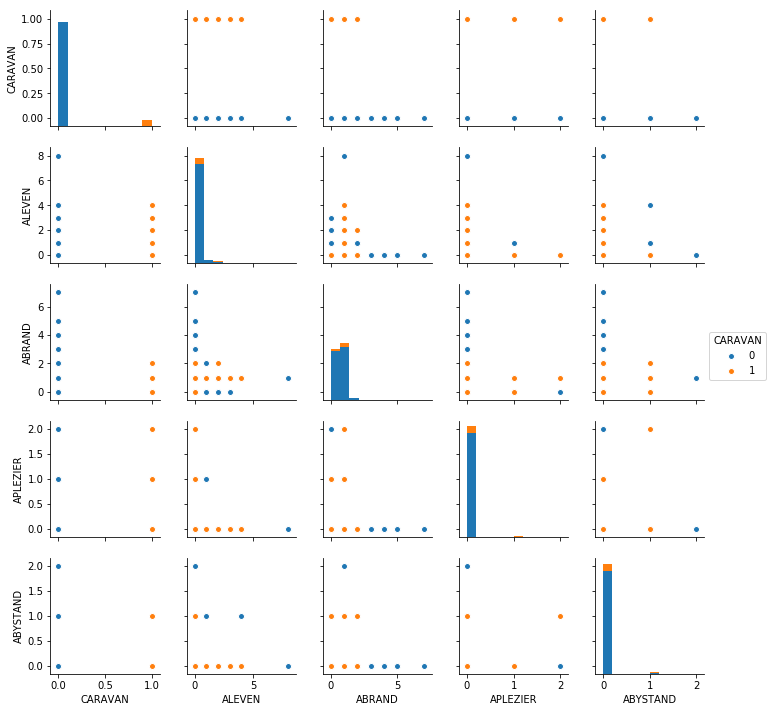

In [18]:

sns.pairplot(df_analisis, 
             vars = ['CARAVAN','ALEVEN','ABRAND','APLEZIER','ABYSTAND'], 
             hue = 'CARAVAN', diag_kind = 'hist', 
             size = 2);

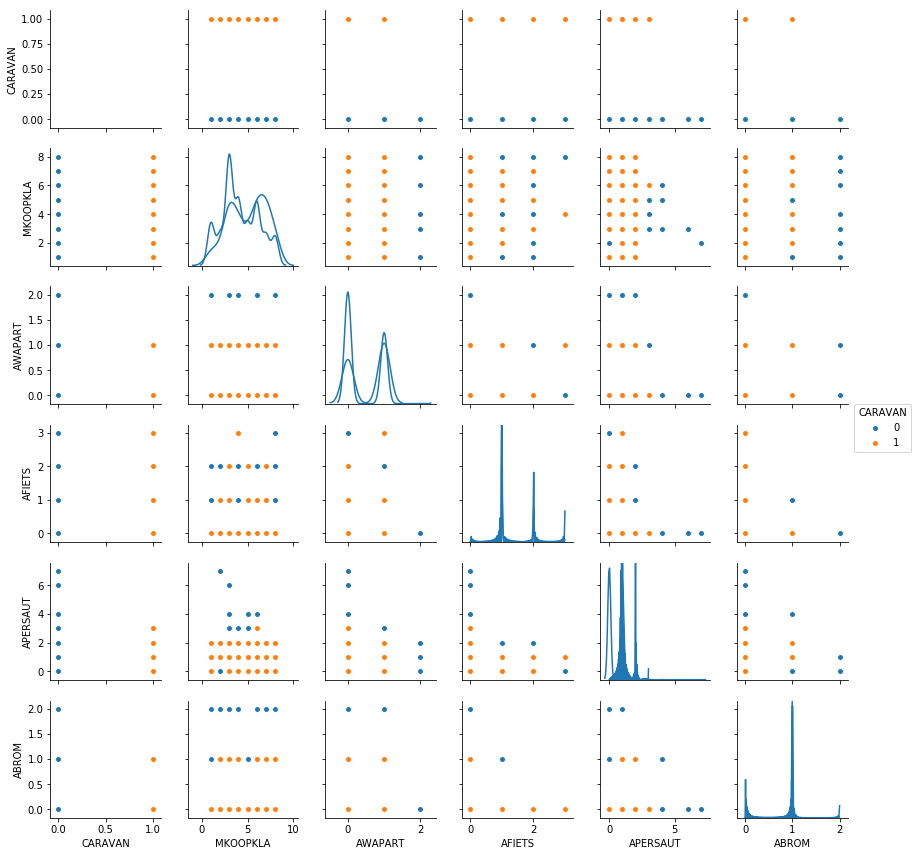

In [19]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df_analisis, 
             vars = ['CARAVAN','MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABROM'], 
             hue = 'CARAVAN', diag_kind = 'kde', 
             size = 2);


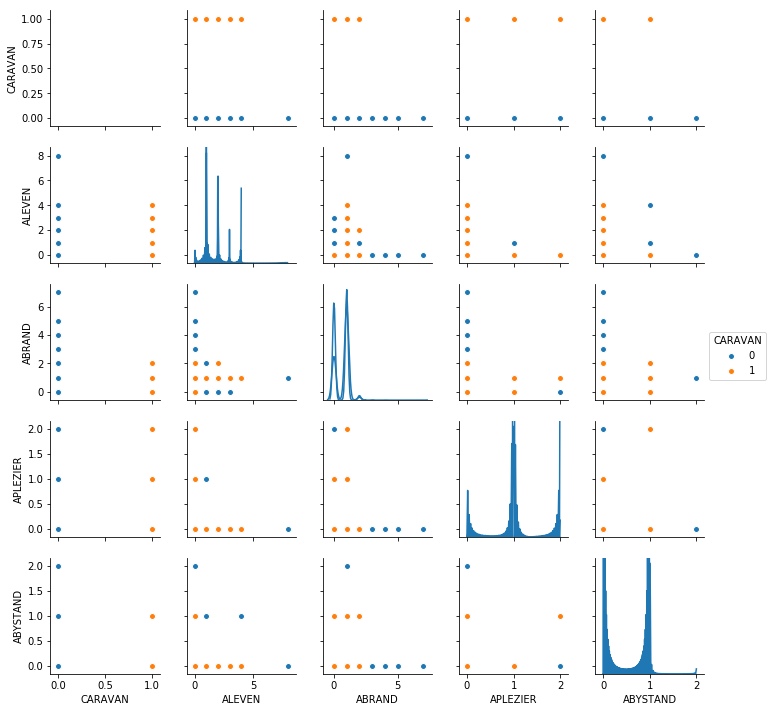

In [20]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df_analisis, 
             vars = ['CARAVAN','ALEVEN','ABRAND','APLEZIER','ABYSTAND'], 
             hue = 'CARAVAN', diag_kind = 'kde', 
             size = 2);


## ANALISIS DE LA VARIABLE APERSAUT
Esta variable identifica el número de polizas de coche que tiene contratadas cada cliente

In [21]:
apersaut = df['APERSAUT']
#Vemos el numero de veces que se repite cada valor
num_reps_apersaut = apersaut.value_counts()
num_reps_apersaut

0    2845
1    2712
2     246
3      12
4       5
7       1
6       1
Name: APERSAUT, dtype: int64

 Vemos que los valores se encuentran entre 0 y 7, es decir que o bien no tienen ninguna poliza de coche contratada o tienen hasta un total de siete

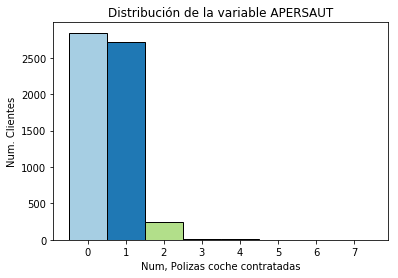

In [22]:
plt.bar( df['APERSAUT'].value_counts().index, 
        df['APERSAUT'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num, Polizas coche contratadas')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable APERSAUT');
plt.xticks(list(range(0, 8)));

En esta gráfica se aprecia como la mayoría de clientes o bien no tienen poliza de coche (practicamente el 50% de los clientes) o solo tienen una

Buscamos ahora los clientes de ete tipo que terminan contratando un poliza de caravana

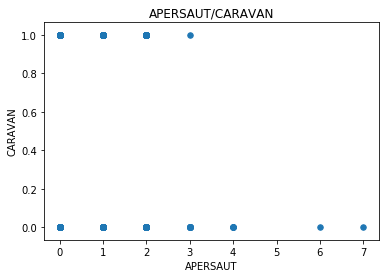

In [23]:
ax = df.plot(kind='scatter', x='APERSAUT', y='CARAVAN',title='APERSAUT/CARAVAN', style="o", s=30)
ax.set_xlabel("APERSAUT")
ax.set_ylabel("CARAVAN")

Se aprecia en la gráfica que los que tienen más de 4 polizas contratadas ya no contratan polizas de caravana

Ahora buscamos en que porcentaje cada grupo contrata una poliza de caravana

In [24]:
grouped_apersaut = df.groupby(['APERSAUT', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_apersaut_1 = grouped_apersaut.loc[ (grouped_apersaut['APERSAUT']==0) 
                                          | (grouped_apersaut['APERSAUT']==1) 
                                          | (grouped_apersaut['APERSAUT']==2)
                                          | (grouped_apersaut['APERSAUT']==3)]
grouped_apersaut_1



,APERSAUT,CARAVAN,TOTAL
0,0,0,2773
1,0,1,72
2,1,0,2475
3,1,1,237
4,2,0,208
5,2,1,38
6,3,0,11
7,3,1,1


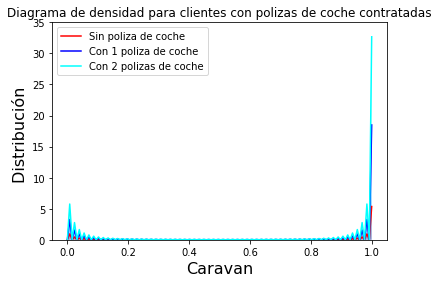

In [25]:
fig =sns.kdeplot(df.loc[df['APERSAUT'] == 0, 'CARAVAN'], 
           label = 'Sin poliza de coche', shade = True,color='red')

fig =sns.kdeplot(df.loc[df['APERSAUT'] == 1, 'CARAVAN'], 
            label = 'Con 1 poliza de coche', shade = True, color='blue')

fig =sns.kdeplot(df.loc[df['APERSAUT'] == 2, 'CARAVAN'], 
            label = 'Con 2 polizas de coche', shade = True, color= 'cyan')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución ', fontsize=16)
plt.yticks([0, 5, 10, 15,20,25,30,35])
plt.title('Diagrama de densidad para clientes con polizas de coche contratadas')

Entre la tabla y la gráfica vemos que son los clientes con dos polizas de coche contratadas los que más contratan polizas de caravana

## Analisis de la Variable APLEZIER
Esta variable indica el numero de polizas de barco que tiene contratado cada cliente

In [26]:
aplezier = df['APLEZIER']
#Vemos el numero de veces que se repite cada valor
num_reps_aplezier = aplezier.value_counts()
num_reps_aplezier

0    5789
1      31
2       2
Name: APLEZIER, dtype: int64

Los valores que tenemos estan entre el 0 (sin poliza de barco) y 2 como mucho

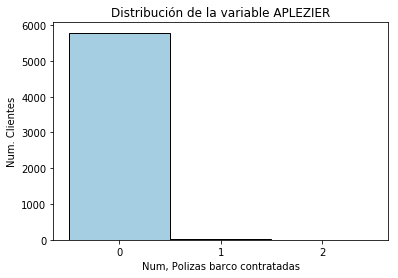

In [27]:
plt.bar( df['APLEZIER'].value_counts().index, 
        df['APLEZIER'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num, Polizas barco contratadas')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable APLEZIER');
plt.xticks(list(range(0, 3)));

Si bien el valor predominante son clientes que no tienen poliza de barco

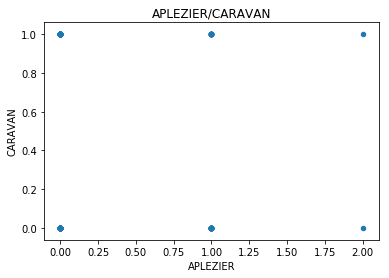

In [28]:
ax = df.plot(kind='scatter', x='APLEZIER', y='CARAVAN',title='APLEZIER/CARAVAN', style="o", s=20)
ax.set_xlabel("APLEZIER")
ax.set_ylabel("CARAVAN")

Podemos ver que en este caso cualquiera de los casos puede contratar en algún momento una poliza de caravana

In [29]:
grouped_aplezier = df.groupby(['APLEZIER', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['APLEZIER']==0) | 
                                          (grouped_aplezier['APLEZIER']==1) | 
                                          (grouped_aplezier['APLEZIER']==2)]
grouped_aplezier_1

,APLEZIER,CARAVAN,TOTAL
0,0,0,5454
1,0,1,335
2,1,0,19
3,1,1,12
4,2,0,1
5,2,1,1


Se ve que los que tienen dos polizas la mitad contratan poliza de caravana, pero es tan pequeño el numero de personas con dos polizas que no se debería tener en cuenta

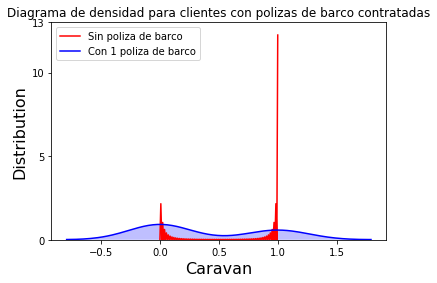

In [30]:
sns.kdeplot(df.loc[df['APLEZIER'] == 0, 'CARAVAN'], 
           label = 'Sin poliza de barco', shade = True,color='red')

fig =sns.kdeplot(df.loc[df['APLEZIER'] == 1, 'CARAVAN'], 
            label = 'Con 1 poliza de barco', shade = True, color='blue')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribution', fontsize=16)
plt.yticks([0, 5, 10, 13])
plt.title('Diagrama de densidad para clientes con polizas de barco contratadas')

# Análisis Variable MKOOPKLA (Purchasing power class 1-8)
Esta variable muestra la  Clase de poder adquisitivo del cliente 

In [31]:
mkoopla = df['MKOOPKLA']
#Vemos el numero de veces que se repite cada valor
num_reps_mkoopla = mkoopla.value_counts()
num_reps_mkoopla

3    1524
4     902
6     901
1     587
5     583
7     474
8     426
2     425
Name: MKOOPKLA, dtype: int64

El poder adquisitivo se refleja mediante valores del 1 al 8, siendo el 1 el poder adquisitivo más bajo y 8 el más alto

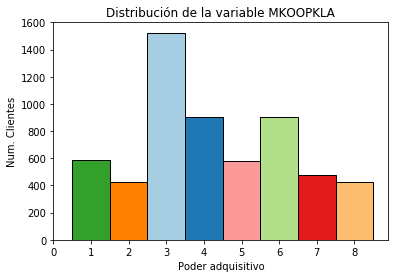

In [32]:
plt.bar( df['MKOOPKLA'].value_counts().index, 
        df['MKOOPKLA'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Poder adquisitivo')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable MKOOPKLA');
plt.xticks(list(range(0, 9)));

Predominan los clientes con un poder adquisitivo medio

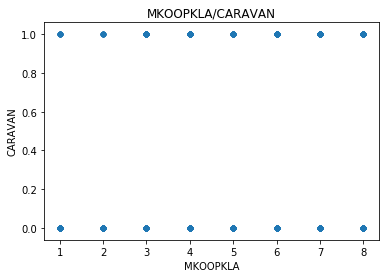

In [33]:
ax = df.plot(kind='scatter', x='MKOOPKLA', y='CARAVAN',title='MKOOPKLA/CARAVAN', style="o", s=20)
ax.set_xlabel("MKOOPKLA")
ax.set_ylabel("CARAVAN")

Como se puede ver en todos los niveles contratan polizas de caravana.

Centrandonos en los grupos más representativos vemos en que porcentaje contratan polizas de caravana

In [34]:
grouped_aplezier = df.groupby(['MKOOPKLA', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['MKOOPKLA']==3) | 
                                          (grouped_aplezier['MKOOPKLA']==4) | 
                                          (grouped_aplezier['MKOOPKLA']==6)| 
                                          (grouped_aplezier['MKOOPKLA']==7)| 
                                          (grouped_aplezier['MKOOPKLA']==8)]
grouped_aplezier_1

,MKOOPKLA,CARAVAN,TOTAL
4,3,0,1453
5,3,1,71
6,4,0,856
7,4,1,46
10,6,0,835
11,6,1,66
12,7,0,407
13,7,1,67
14,8,0,391
15,8,1,35


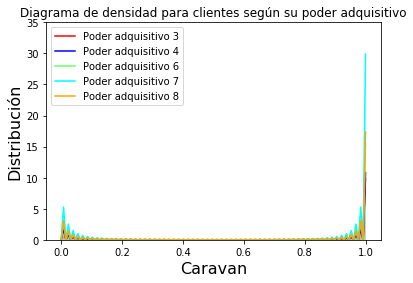

In [35]:
sns.kdeplot(df.loc[df['MKOOPKLA'] == 3, 'CARAVAN'], 
               label = 'Poder adquisitivo 3',  color='red')

sns.kdeplot(df.loc[df['MKOOPKLA'] == 4, 'CARAVAN'], 
            label = 'Poder adquisitivo 4', shade = True, color='blue')

sns.kdeplot(df.loc[df['MKOOPKLA'] == 6, 'CARAVAN'], 
            label = 'Poder adquisitivo 6', shade = True, color='#66ff66')

sns.kdeplot(df.loc[df['MKOOPKLA'] == 7, 'CARAVAN'], 
            label = 'Poder adquisitivo 7', shade = True, color='cyan')

sns.kdeplot(df.loc[df['MKOOPKLA'] == 8, 'CARAVAN'], 
            label = 'Poder adquisitivo 8', shade = True, color='orange')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 5, 10, 15, 20,25,30,35])
plt.title('Diagrama de densidad para clientes según su poder adquisitivo')

Se aprecia que los que tienen un poder adquisitivo más alto, proporcionalmente, contratan más polizas de seguro de caravanas

# Análisis Variable AWAPART 
Esta variable muestra  el número de seguros privados de terceros del cliente 

In [36]:
awapart = df['AWAPART']
#Vemos el numero de veces que se repite cada valor
num_reps_awapart = awapart.value_counts()
num_reps_awapart

0    3482
1    2334
2       6
Name: AWAPART, dtype: int64

Toma valores entre 0 y 2

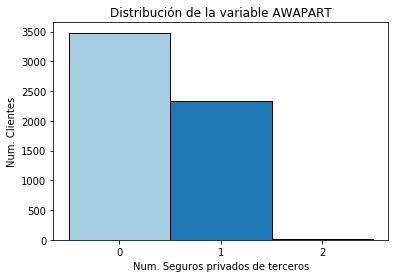

In [37]:
plt.bar( df['AWAPART'].value_counts().index, 
        df['AWAPART'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num. Seguros privados de terceros')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable AWAPART');
plt.xticks(list(range(0, 3)));

Si bien los que tienen dos polizas privadas de terceros su representación es mínima

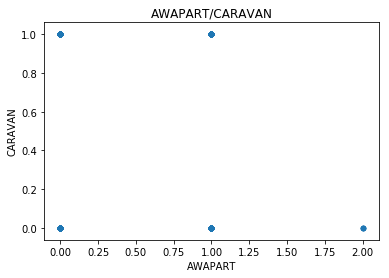

In [38]:
ax = df.plot(kind='scatter', x='AWAPART', y='CARAVAN',title='AWAPART/CARAVAN', style="o", s=20)
ax.set_xlabel("AWAPART")
ax.set_ylabel("CARAVAN")

De hecho ningunos de los que tienen dos polizas privadas de terceros contrata una poliza de caravana

In [39]:
grouped_aplezier = df.groupby(['AWAPART', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['AWAPART']==0) | 
                                          (grouped_aplezier['AWAPART']==1) | 
                                          (grouped_aplezier['AWAPART']==2)]
grouped_aplezier_1

,AWAPART,CARAVAN,TOTAL
0,0,0,3335
1,0,1,147
2,1,0,2133
3,1,1,201
4,2,0,6


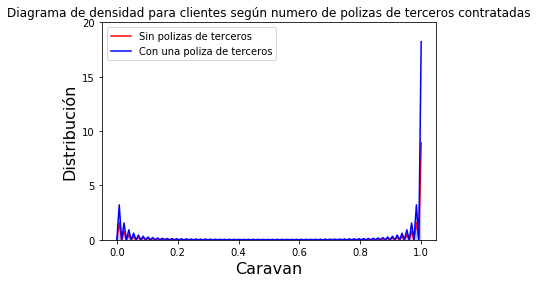

In [40]:
sns.kdeplot(df.loc[df['AWAPART'] == 0, 'CARAVAN'], 
               label = 'Sin polizas de terceros',  color='red')

sns.kdeplot(df.loc[df['AWAPART'] == 1, 'CARAVAN'], 
            label = 'Con una poliza de terceros', shade = True, color='blue')


plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 5, 10, 15, 20])
plt.title('Diagrama de densidad para clientes según numero de polizas de terceros contratadas')

Los clientes con una poliza de terceros tienen un porcentaje más alto de contratación de polizas de caravanas

# Análisis Variable ABYSTAND 
Esta variable muestra   el número de pólizas de seguro de seguridad social  del cliente 

In [41]:
abystand = df['ABYSTAND']
#Vemos el numero de veces que se repite cada valor
num_reps_abystand = abystand.value_counts()
num_reps_abystand

0    5740
1      81
2       1
Name: ABYSTAND, dtype: int64

Esta variable también toma valores entre 0 y 2, es decir los clientes como mucho tienen dos polizas de seguridad social

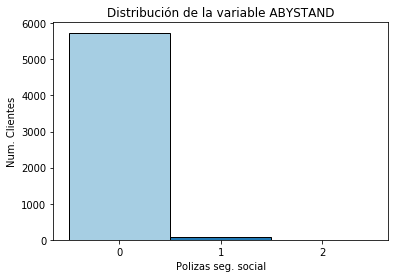

In [42]:
plt.bar( df['ABYSTAND'].value_counts().index, 
        df['ABYSTAND'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Polizas seg. social')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable ABYSTAND');
plt.xticks(list(range(0, 3)));

Se aprecia como practicamente todos los clientes no tienen poliza de seguridad social

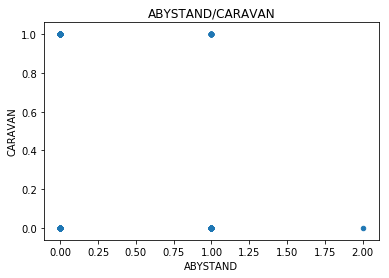

In [43]:
ax = df.plot(kind='scatter', x='ABYSTAND', y='CARAVAN',title='ABYSTAND/CARAVAN', style="o", s=20)
ax.set_xlabel("ABYSTAND")
ax.set_ylabel("CARAVAN")

Solo contratan polizas de carvana los que tienen una o ninguna poliza de la seguridad social

In [44]:
grouped_aplezier = df.groupby(['ABYSTAND', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['ABYSTAND']==0) | 
                                          (grouped_aplezier['ABYSTAND']==1) | 
                                          (grouped_aplezier['ABYSTAND']==2)]
grouped_aplezier_1

,ABYSTAND,CARAVAN,TOTAL
0,0,0,5408
1,0,1,332
2,1,0,65
3,1,1,16
4,2,0,1


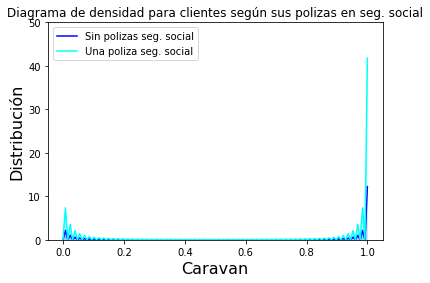

In [45]:
sns.kdeplot(df.loc[df['ABYSTAND'] == 0, 'CARAVAN'], 
               label = 'Sin polizas seg. social', shade = True, color='blue')

sns.kdeplot(df.loc[df['ABYSTAND'] == 1, 'CARAVAN'], 
            label = 'Una poliza seg. social', shade = True, color='cyan')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 10, 20, 30, 40, 50])
plt.title('Diagrama de densidad para clientes según sus polizas en seg. social')

Teniendo un mayor porcentaje de contratación los que tienen una poliza de seguridad social contratada

# Análisis Variable ABRAND 

Esta variable muestra el número de polizas contra incendio contratadas por el cliente 

In [46]:
abrand = df['ABRAND']
#Vemos el numero de veces que se repite cada valor
num_reps_abrand = abrand.value_counts()
num_reps_abrand

1    3017
0    2666
2     126
3       7
4       3
5       2
7       1
Name: ABRAND, dtype: int64

Vemos como hay clientes que llegan a tener siete polizas de incendio contratadas

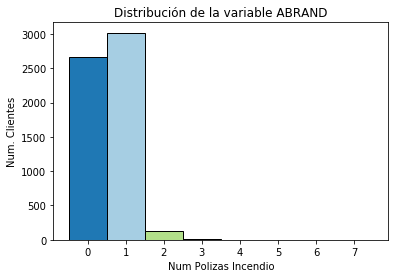

In [47]:
plt.bar( df['ABRAND'].value_counts().index, 
        df['ABRAND'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num Polizas Incendio')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable ABRAND');
plt.xticks(list(range(0, 8)));

Aunque los dos grupos principales son los que tienen una o ninguna poliza de incendio contratada

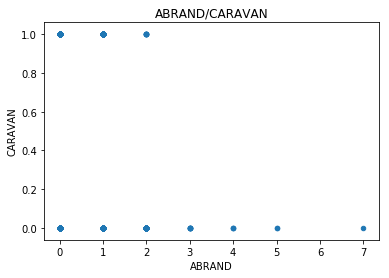

In [48]:
ax = df.plot(kind='scatter', x='ABRAND', y='CARAVAN',title='ABRAND/CARAVAN', style="o", s=20)
ax.set_xlabel("ABRAND")
ax.set_ylabel("CARAVAN")

Solo los clientes que no tienen o tienen hasta dos polizas de incendio contratadas son los que contratan polizas de caravanas

In [49]:
grouped_aplezier = df.groupby(['ABRAND', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['ABRAND']==0) | 
                                          (grouped_aplezier['ABRAND']==1) | 
                                          (grouped_aplezier['ABRAND']==2)]
grouped_aplezier_1

,ABRAND,CARAVAN,TOTAL
0,0,0,2557
1,0,1,109
2,1,0,2785
3,1,1,232
4,2,0,119
5,2,1,7


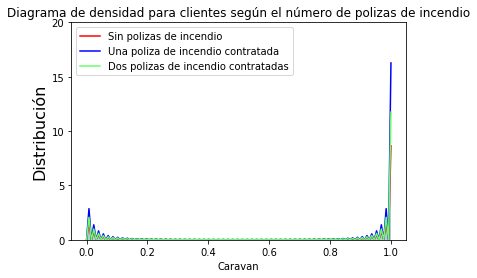

In [50]:
sns.kdeplot(df.loc[df['ABRAND'] == 0, 'CARAVAN'], 
               label = 'Sin polizas de incendio',  color='red')

sns.kdeplot(df.loc[df['ABRAND'] == 1, 'CARAVAN'], 
            label = 'Una poliza de incendio contratada', shade = True, color='blue')

sns.kdeplot(df.loc[df['ABRAND'] == 2, 'CARAVAN'], 
            label = 'Dos polizas de incendio contratadas', shade = True, color='#66ff66')

plt.xlabel('Caravan')
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 5, 10, 15, 20])
plt.title('Diagrama de densidad para clientes según el número de polizas de incendio')

Y vemos como los clientes que tienen solo una poliza de incendio son los que más contratan polizas de caravanas.

# Análisis Variable ABROM 
Esta variable muestra el número de pólizas de ciclomotor contratadas por el cliente 

In [51]:
abrom = df['ABROM']
#Vemos el numero de veces que se repite cada valor
num_reps_abrom = abrom.value_counts()
num_reps_abrom

0    5426
1     382
2      14
Name: ABROM, dtype: int64

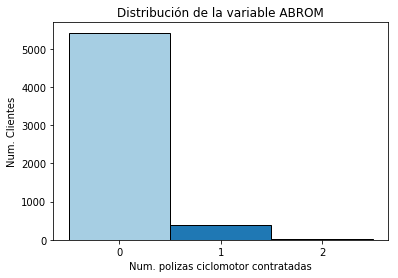

In [52]:
plt.bar( df['ABROM'].value_counts().index, 
        df['ABROM'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num. polizas ciclomotor contratadas')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable ABROM');
plt.xticks(list(range(0, 3)));

La mayoría de los clientes no tienen poliza de moto contratada

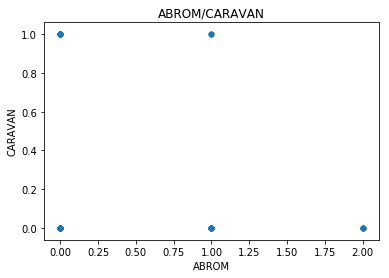

In [53]:
ax = df.plot(kind='scatter', x='ABROM', y='CARAVAN',title='ABROM/CARAVAN', style="o", s=20)
ax.set_xlabel("ABROM")
ax.set_ylabel("CARAVAN")

Los pocos que tienen dos polizas de motos contratadas nunca contratan polizas de caravanas

grouped_aplezier = df.groupby(['ABROM', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['ABROM']==0) | 
                                          (grouped_aplezier['ABROM']==1)]
grouped_aplezier_1

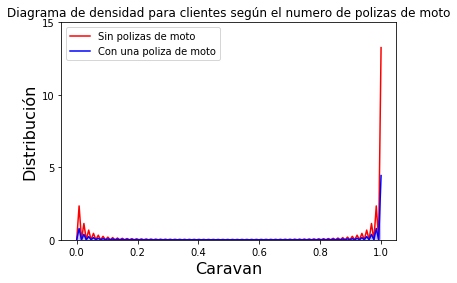

In [54]:
sns.kdeplot(df.loc[df['ABROM'] == 0, 'CARAVAN'], 
               label = 'Sin polizas de moto',  color='red')

sns.kdeplot(df.loc[df['ABROM'] == 1, 'CARAVAN'], 
            label = 'Con una poliza de moto', shade = True, color='blue')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 5, 10, 15])
plt.title('Diagrama de densidad para clientes según el numero de polizas de moto')

Los clientes sin poliza de moto contratan con mas asiduidad polizas de carvana

# Análisis Variable ALEVEN 

Esta variable muestra las polizas de vida contratadas por el cliente 

In [55]:
aleven = df['ALEVEN']
#Vemos el numero de veces que se repite cada valor
num_reps_aleven = aleven.value_counts()
num_reps_aleven

0    5529
1     173
2     100
3      11
4       8
8       1
Name: ALEVEN, dtype: int64

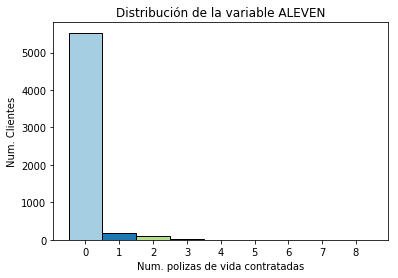

In [56]:
plt.bar( df['ALEVEN'].value_counts().index, 
        df['ALEVEN'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num. polizas de vida contratadas')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable ALEVEN');
plt.xticks(list(range(0, 9)));

Como se ve, hay clientes con hasta 8 polizas de seguro de vida contratadas si bien lo más normal es que no tengan ninguna contratada

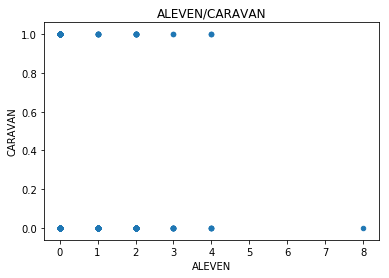

In [57]:
ax = df.plot(kind='scatter', x='ALEVEN', y='CARAVAN',title='ALEVEN/CARAVAN', style="o", s=20)
ax.set_xlabel("ALEVEN")
ax.set_ylabel("CARAVAN")

Los seguros de caravanas solo son contratados por usuarios con hasta cuatro seguros de vida

In [58]:
grouped_aplezier = df.groupby(['ALEVEN', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['ALEVEN']==0) | 
                                          (grouped_aplezier['ALEVEN']==1) | 
                                          (grouped_aplezier['ALEVEN']==2)]
grouped_aplezier_1

,ALEVEN,CARAVAN,TOTAL
0,0,0,5204
1,0,1,325
2,1,0,165
3,1,1,8
4,2,0,90
5,2,1,10


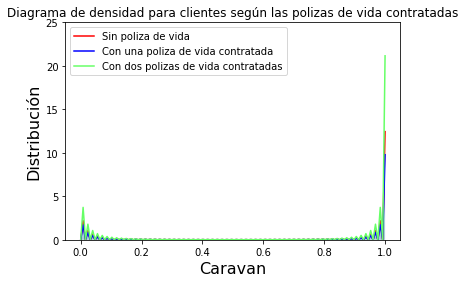

In [59]:
sns.kdeplot(df.loc[df['ALEVEN'] == 0, 'CARAVAN'], 
               label = 'Sin poliza de vida',  color='red')

sns.kdeplot(df.loc[df['ALEVEN'] == 1, 'CARAVAN'], 
            label = 'Con una poliza de vida contratada', shade = True, color='blue')

sns.kdeplot(df.loc[df['ALEVEN'] == 2, 'CARAVAN'], 
            label = 'Con dos polizas de vida contratadas', shade = True, color='#66ff66')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 5, 10, 15, 20,25])
plt.title('Diagrama de densidad para clientes según las polizas de vida contratadas')

Y son los clientes que tienen dos polizas de vida los que más contratan seguros de caravana

# Análisis Variable AFIETS 
Esta variable muestra el número de polizas de bicicletas contratadas por el cliente 

In [60]:
afiets = df['AFIETS']
#Vemos el numero de veces que se repite cada valor
num_reps_afiets = afiets.value_counts()
num_reps_afiets

0    5675
1     111
2      34
3       2
Name: AFIETS, dtype: int64

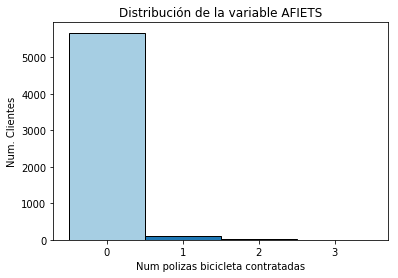

In [61]:
plt.bar( df['AFIETS'].value_counts().index, 
        df['AFIETS'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1, color=plt.cm.Paired(np.arange(len(df))) )

plt.xlabel('Num polizas bicicleta contratadas')
plt.ylabel('Num. Clientes')
plt.title('Distribución de la variable AFIETS');
plt.xticks(list(range(0, 4)));

Muy pocos clientes tienen seguros de bicicletas contratadas si bien hay alguno que llega a tener tres

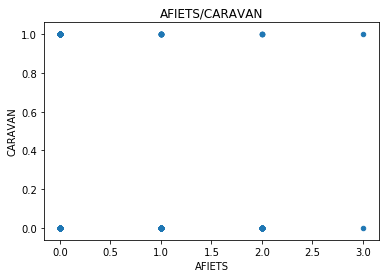

In [62]:
ax = df.plot(kind='scatter', x='AFIETS', y='CARAVAN',title='AFIETS/CARAVAN', style="o", s=20)
ax.set_xlabel("AFIETS")
ax.set_ylabel("CARAVAN")

Todos los grupos llegan a contratar polizas de caravana

In [63]:
grouped_aplezier = df.groupby(['AFIETS', 'CARAVAN']).size().reset_index(name='TOTAL')
grouped_aplezier_1 = grouped_aplezier.loc[ (grouped_aplezier['AFIETS']==0) | 
                                          (grouped_aplezier['AFIETS']==1) | 
                                          (grouped_aplezier['AFIETS']==2)| 
                                          (grouped_aplezier['AFIETS']==3)]
grouped_aplezier_1

,AFIETS,CARAVAN,TOTAL
0,0,0,5342
1,0,1,333
2,1,0,101
3,1,1,10
4,2,0,30
5,2,1,4
6,3,0,1
7,3,1,1


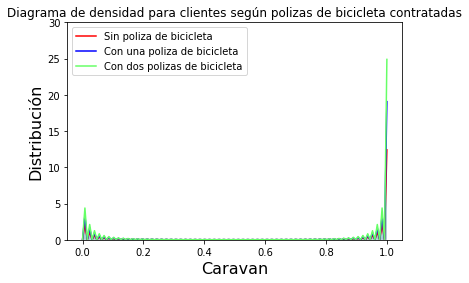

In [64]:
sns.kdeplot(df.loc[df['AFIETS'] == 0, 'CARAVAN'], 
               label = 'Sin poliza de bicicleta',  color='red')

sns.kdeplot(df.loc[df['AFIETS'] == 1, 'CARAVAN'], 
            label = 'Con una poliza de bicicleta', shade = True, color='blue')

sns.kdeplot(df.loc[df['AFIETS'] == 2, 'CARAVAN'], 
            label = 'Con dos polizas de bicicleta', shade = True, color='#66ff66')

plt.xlabel('Caravan', fontsize=16)
plt.ylabel('Distribución', fontsize=16)
plt.yticks([0, 5, 10, 15, 20,25,30])
plt.title('Diagrama de densidad para clientes según polizas de bicicleta contratadas')

Son los que tienen dos polizas de bicicleta los que más contratan polizas de caravana

# PREPARACION DATOS DE TRAIN Y TEST

Se analiza la distribucion de la variable de salida

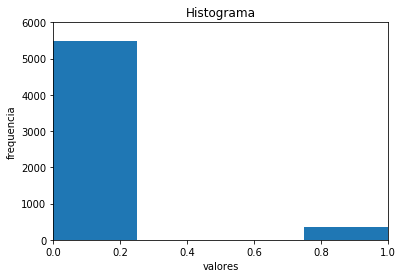

In [65]:
df['CARAVAN'] = df['CARAVAN'].astype('category')

plt.hist(df['CARAVAN'],4)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.axis([0, 1,0,6000])
plt.title('Histograma')
plt.show()


Se puede observar que claramente nos encontramos ante un juego de datos desbalanceado

Dividimos en train y test todas las variables

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_analisis2, y_analisis, test_size=0.2)

In [67]:
target_names = ['0', '1']

# ENFOQUE DEL ESTUDIO

Como se ha podido observar, el juego de datos no esta balanceado respecto a su variable salida. Se van a plantear distintas tecnicas, las cuales van a proporcionar diferentes escenarios, en los que aplicaremos los distintos modelos seleccionados.
Los distintos escenarios son:
- Generación de modelos basado en los datos de train iniciales
- Generación de modelos basado en los datos de train balanceados mediante SMOTE
- Generación de modelos basado en los datos de train balanceados mediante submuestreo

Se probará la bondad de cada uno de los modelos con los datos de test separados inicialmente y con un segundo conjunto de test facilitado por el proveedor de los datos. 

In [68]:

def plot_ROC(y_test_true, y_test_prob):
 
    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    cm_test = confusion_matrix(y_test_true, y_test_prob)
    acc_test = accuracy_score(y_test_true, y_test_prob)
    auc_test = roc_auc_score(y_test_true, y_test_prob)

    print ('Test Accuracy: %s ' %acc_test)
    print ('Test AUC: %s ' %auc_test)
    print ('Test Confusion Matrix:')
    print ('')
    print(cm_test)
    print ('')
    
    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])
    
    type_0_accuracy = float(cm_test[0][0])/(cm_test[0][0] + cm_test[0][1])
    type_1_accuracy = float(cm_test[1][1])/(cm_test[1][0] + cm_test[1][1])
    
    print('probabilibad de acierto clase 0: (%.3f)' %(type_0_accuracy*100))
    print('probabilibad de acierto clase 1: (%.3f)' %(type_1_accuracy*100))
       
    
    fig = plt.figure(figsize=(10,5)) 
    ax2 = fig.add_subplot(122)
    ax2.plot(fpr_test, tpr_test, color='red')
    ax2.plot([0, 1], [0, 1], color='blue', linestyle='--')
    ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.savefig('ROC', dpi = 500)
    plt.show()


# DATOS ORIGINALES

## Regression logistica

In [69]:
logreg = LogisticRegression()

In [70]:
logistic_1 =logreg.fit(X_train, y_train)

In [71]:
y_pred = logistic_1.predict(X_train)

In [72]:
print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4384
          1       0.20      0.00      0.01       273

avg / total       0.90      0.94      0.91      4657



Se puede observar muy buen porcentaje de acierto general, gracias a que clasifica correctamente la clase mayoritaria, pero en cuanto a la clasificacion de la clase minotiratia la tasa de acierto es muy baja, encontradonos ante un clasificador que no aporta valor

In [73]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,4380,4
1,272,1


Test Accuracy: 0.9407343783551643 
Test AUC: 0.5013752974519398 
Test Confusion Matrix:

[[4380    4]
 [ 272    1]]

probabilibad de acierto clase 0: (99.909)
probabilibad de acierto clase 1: (0.366)


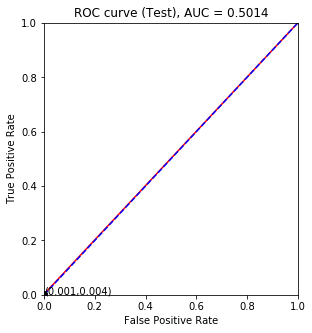

In [74]:
plot_ROC(y_train,y_pred)

Como se puede observar el area bajo la curva es del 50%, y la curva ROC es practicamente una linea diagonal. A persar de tener una tasa de acierto de casi el 100% sobre la clase minoritaria

### Resultados sobre test

In [75]:
y_pred = logistic_1.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1090
          1       0.00      0.00      0.00        75

avg / total       0.88      0.93      0.90      1165



In [77]:
pd.crosstab(y_test,y_pred)

col_0,0,1
CARAVAN,,
0,1089,1
1,75,0


Test Accuracy: 0.934763948497854 
Test AUC: 0.49954128440366974 
Test Confusion Matrix:

[[1089    1]
 [  75    0]]

probabilibad de acierto clase 0: (99.908)
probabilibad de acierto clase 1: (0.000)


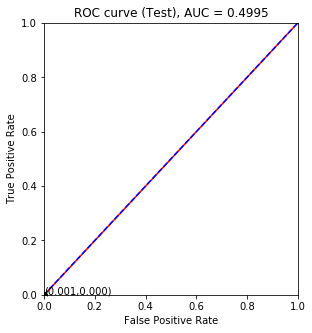

In [78]:
plot_ROC(y_test,y_pred)

sobre el conjunto de test se puede constatar que el modelo generado no tiene valor

## Ramdom Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier()

In [81]:
rf_1 =rf.fit(X_train, y_train)

In [82]:
y_pred = rf_1.predict(X_train)

In [83]:
print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      4384
          1       0.85      0.12      0.21       273

avg / total       0.94      0.95      0.93      4657



In [84]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,4378,6
1,240,33


Test Accuracy: 0.947176293751342 
Test AUC: 0.5597552538702174 
Test Confusion Matrix:

[[4378    6]
 [ 240   33]]

probabilibad de acierto clase 0: (99.863)
probabilibad de acierto clase 1: (12.088)


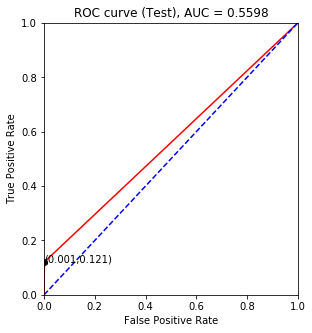

In [85]:
plot_ROC(y_train, y_pred)

Con el mismo juego de datos utilizado para el modelo basado en una regresion logística. El modelo obtenido es algo mejor.
Se puede observar una mayor area bajo la curva y un porcentaje de acierto más elevado sobre la clase mimnoritaria, manteniendose la tasa de acierto en la clase mayoritaria

### Resultados sobre test

In [86]:
y_pred = rf_1.predict(X_test)

In [87]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,1087,3
1,73,2


Test Accuracy: 0.934763948497854 
Test AUC: 0.5119571865443424 
Test Confusion Matrix:

[[1087    3]
 [  73    2]]

probabilibad de acierto clase 0: (99.725)
probabilibad de acierto clase 1: (2.667)


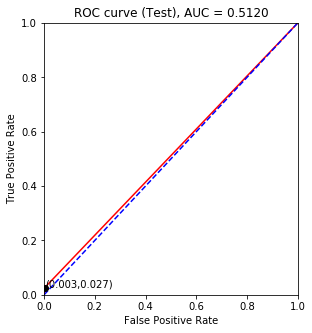

In [88]:
plot_ROC(y_test, y_pred)

Cuando se aplica el modelo sobre los datos de test. Se puede observar que los datos obtenidos sobre los datos de train no se mantiene obteniendo un resultado similar al obtenido con el modelo de la regresion logistica

## KNeighborgs

In [89]:
 from sklearn.neighbors import KNeighborsClassifier

In [90]:
neigh = KNeighborsClassifier(n_neighbors=1)
ne1_1 = neigh.fit(X_train, y_train) 

In [91]:
y_pred = ne1_1.predict(X_train)

In [92]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,4001,383
1,206,67


In [93]:
print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93      4384
          1       0.15      0.25      0.19       273

avg / total       0.90      0.87      0.89      4657



Test Accuracy: 0.8735237277217093 
Test AUC: 0.5790290533675571 
Test Confusion Matrix:

[[4001  383]
 [ 206   67]]

probabilibad de acierto clase 0: (91.264)
probabilibad de acierto clase 1: (24.542)


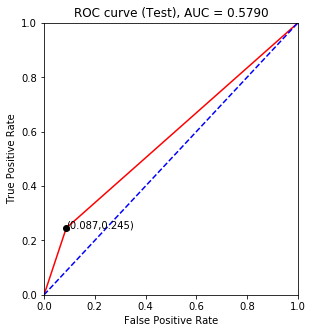

In [94]:
plot_ROC(y_train, y_pred)

Se prueba el modelo basado en la clasificación de las muestras en base a sus vecinos. En un primer modelo se  configura en uno el numero de vecinos en base a los cuales se va a clasificar cada muestra.

Se puede observar un rendimimento mejor que en el caso del modelo random forest. En este caso y sobre los datos de entrenamiento. Se clasifican correctamente un 93% de la clase mayoritaria y un 50 por ciento de la clase minoritaria. Alcanzando el area bajo la curva el 72%

Se pueba como alternativa, el mismo modelo pero considerando 3 vecinos en lugar de 1.

In [95]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
ne1_3 = neigh3.fit(X_train, y_train) 

In [96]:
y_pred = ne1_3.predict(X_train)

In [97]:
print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      4384
          1       0.12      0.07      0.09       273

avg / total       0.90      0.91      0.90      4657



In [98]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,4237,147
1,253,20


Test Accuracy: 0.9141077947176294 
Test AUC: 0.5198645256811315 
Test Confusion Matrix:

[[4237  147]
 [ 253   20]]

probabilibad de acierto clase 0: (96.647)
probabilibad de acierto clase 1: (7.326)


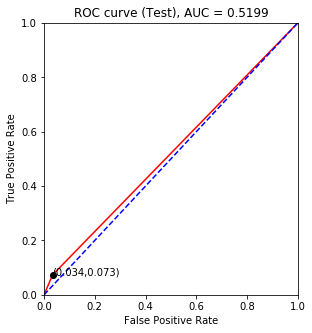

In [99]:
plot_ROC(y_train, y_pred)

Se puede observar que el comportamiento cae, llegando a clasificar correctamente solo el 20% de los muestras minoritarias. Recordamos que teniendo en cuenta solo un vecino, se obtenia el 50% en los datos de train

### Resultados sobre test

In [100]:
y_pred = ne1_1.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.94      0.91      0.93      1090
          1       0.11      0.16      0.13        75

avg / total       0.89      0.86      0.88      1165



In [102]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,995,95
1,63,12


Test Accuracy: 0.8643776824034335 
Test AUC: 0.5364220183486238 
Test Confusion Matrix:

[[995  95]
 [ 63  12]]

probabilibad de acierto clase 0: (91.284)
probabilibad de acierto clase 1: (16.000)


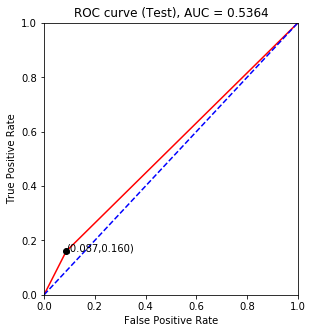

In [103]:
plot_ROC(y_test, y_pred)

Se pueba como alternativa considenrando 3 vecinos en lugar de 1.

In [104]:
y_pred = ne1_3.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1090
          1       0.10      0.05      0.07        75

avg / total       0.88      0.91      0.89      1165



In [106]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,1052,38
1,71,4


Test Accuracy: 0.9064377682403434 
Test AUC: 0.5092354740061161 
Test Confusion Matrix:

[[1052   38]
 [  71    4]]

probabilibad de acierto clase 0: (96.514)
probabilibad de acierto clase 1: (5.333)


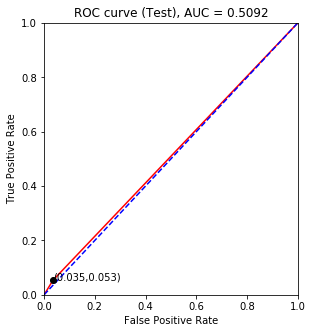

In [107]:
plot_ROC(y_test, y_pred)

Validando los modelos contra los datos de test. Se puede observar que el modelo KNeighbors basado en 3 vecinos obtiene el mismo resultado que los modelos probados previamente, pero para el caso de un vecino, se puede observar una mejora a la hora de clasificar los datos minoritarios, llegando una tasa del 20% de acierto. Aun habiendo mejorado los modelos previos, tampoco se puede considerar un buen modelo.

## SVM 

Kernel lineal

A continuación se van a evaluear tres variadades de los modelos basados en maquinas de vector soporte.
Las tres variadeades seran:
- Basado en un kernel lineal
- Basado en un kernel lineal basado en pesos
- Basado en un kernel rbf (radial basis function)

In [108]:
from sklearn.svm import SVC
from sklearn import svm
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

Kernel lineal

In [109]:
clf = svm.SVC(kernel='linear')
clf_1 = clf.fit(X_train, y_train)

In [110]:
y_pred = clf_1.predict(X_train)

In [111]:
import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4384
          1       0.00      0.00      0.00       273

avg / total       0.89      0.94      0.91      4657



In [112]:
pd.crosstab(y_train, y_pred)

col_0,0
CARAVAN,
0,4384
1,273


Test Accuracy: 0.9413785698947821 
Test AUC: 0.5 
Test Confusion Matrix:

[[4384    0]
 [ 273    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


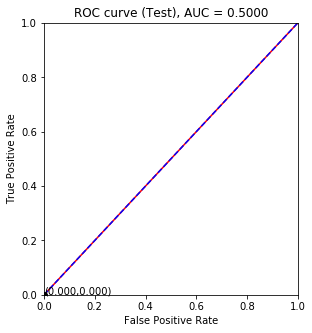

In [113]:
plot_ROC(y_train, y_pred)

El resultado obtenido sobre los datos de train siguen la linea de los modelos previos, se clasifica muy mal la clase minoritaria.

Sabiendo que el problema es desbalanceado, se va a probar con un modelo SVM, basado en un kernel lineal, pero teniendo en cuenta los pesos

In [114]:
wclf = svm.SVC(kernel='linear', class_weight={1: 15})
wclf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight={1: 15}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
y_pred = wclf.predict(X_train)

In [116]:
print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.97      0.72      0.83      4384
          1       0.13      0.66      0.21       273

avg / total       0.92      0.72      0.79      4657



In [117]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,3150,1234
1,93,180


Test Accuracy: 0.7150526089757354 
Test AUC: 0.6889312785754391 
Test Confusion Matrix:

[[3150 1234]
 [  93  180]]

probabilibad de acierto clase 0: (71.852)
probabilibad de acierto clase 1: (65.934)


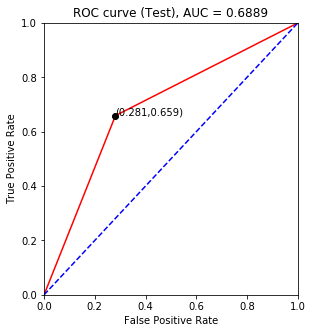

In [118]:
plot_ROC(y_train, y_pred)

Se observa una gran mejora al clasificar las muestras minoritarias, pero sin embargo se ha bajado muchisimo en la clasificacion de la clase mayoritaria.

KErnel RDF

In [119]:
clf = svm.SVC(kernel='rbf')
clf_2 = clf.fit(X_train, y_train)

In [120]:
y_pred = clf_2.predict(X_train)

In [121]:
import warnings
warnings.filterwarnings('ignore')

print(classification_report(y_train, y_pred, target_names=target_names))


             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4384
          1       0.00      0.00      0.00       273

avg / total       0.89      0.94      0.91      4657



In [122]:
pd.crosstab(y_train, y_pred)

col_0,0
CARAVAN,
0,4384
1,273


Test Accuracy: 0.9413785698947821 
Test AUC: 0.5 
Test Confusion Matrix:

[[4384    0]
 [ 273    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


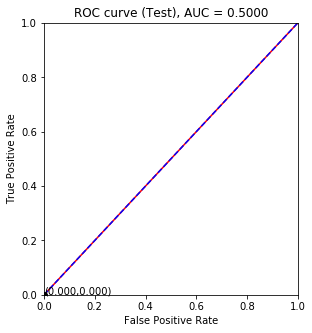

In [123]:
plot_ROC(y_train, y_pred)

Con el modelo basado en el kernel rbf, no clasifica ningun registro en la clase miniritaria.

### Resultados sobre test

kernel lineal

In [124]:
y_pred = clf_1.predict(X_test)

In [125]:
pd.crosstab(y_test, y_pred)

col_0,0
CARAVAN,
0,1090
1,75


Test Accuracy: 0.9356223175965666 
Test AUC: 0.5 
Test Confusion Matrix:

[[1090    0]
 [  75    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


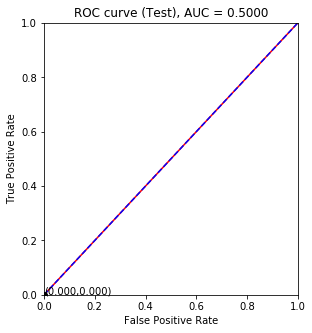

In [126]:
plot_ROC(y_test, y_pred)

Kernel lineal con pesos

In [127]:
y_pred = wclf.predict(X_test)

In [128]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,778,312
1,25,50


Test Accuracy: 0.7107296137339055 
Test AUC: 0.6902140672782874 
Test Confusion Matrix:

[[778 312]
 [ 25  50]]

probabilibad de acierto clase 0: (71.376)
probabilibad de acierto clase 1: (66.667)


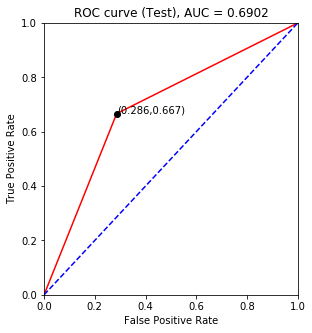

In [129]:
plot_ROC(y_test, y_pred)

Kernel rbf

In [130]:
y_pred = clf_2.predict(X_test)

In [131]:
pd.crosstab(y_test, y_pred)

col_0,0
CARAVAN,
0,1090
1,75


Test Accuracy: 0.9356223175965666 
Test AUC: 0.5 
Test Confusion Matrix:

[[1090    0]
 [  75    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


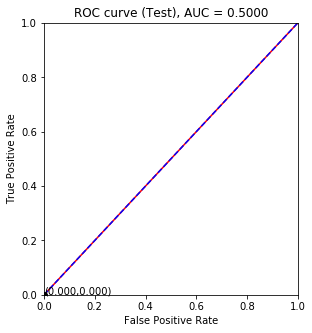

In [132]:
plot_ROC(y_test, y_pred)

Sobre los datos de test se han obtenido unos resultados de clasificación similares a  los obtenidos con los datos de train. Para estos tres modelos, solo es destacabla el caso del kernel lineal basado en pesos, donde se ha obtenido una mejor clasificacion de la clase minoritaria, pero perdiendo mucha tasa de acierto sobre la clase mayoritaria

## Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB


In [134]:
gnb = GaussianNB()


In [135]:
gnb_1 = gnb.fit(X_train, y_train)

In [136]:
y_pred = gnb_1.predict(X_train)

In [137]:
print(classification_report(y_train, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95      4384
          1       0.14      0.15      0.14       273

avg / total       0.90      0.90      0.90      4657



In [138]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,4138,246
1,233,40


Test Accuracy: 0.8971440841743612 
Test AUC: 0.5452035039170076 
Test Confusion Matrix:

[[4138  246]
 [ 233   40]]

probabilibad de acierto clase 0: (94.389)
probabilibad de acierto clase 1: (14.652)


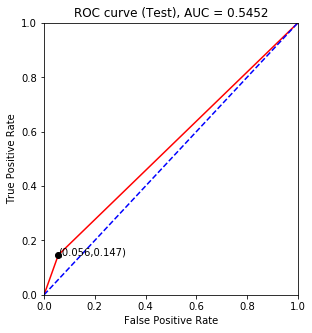

In [139]:
plot_ROC(y_train, y_pred)

Se decide aplicar el modelo, pero dado pesos. Donde se obtiene un modelo mas equilibrado

In [140]:
gnb2 = GaussianNB(priors=[.1, .9])

In [141]:
gnb_3 = gnb2.fit(X_train, y_train)


In [142]:
y_pred = gnb_3.predict(X_train)

In [143]:
pd.crosstab(y_train, y_pred)

col_0,0,1
CARAVAN,,
0,2361,2023
1,68,205


Test Accuracy: 0.5509984968864076 
Test AUC: 0.6447325104943717 
Test Confusion Matrix:

[[2361 2023]
 [  68  205]]

probabilibad de acierto clase 0: (53.855)
probabilibad de acierto clase 1: (75.092)


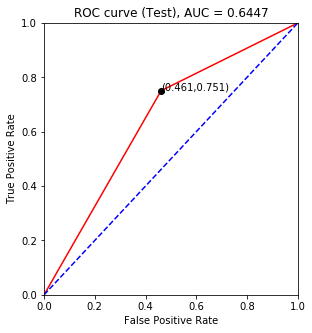

In [144]:
plot_ROC(y_train,y_pred)

### Resultados sobre test

In [145]:
y_pred = gnb_1.predict(X_test)

In [146]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,1025,65
1,60,15


Test Accuracy: 0.8927038626609443 
Test AUC: 0.5701834862385321 
Test Confusion Matrix:

[[1025   65]
 [  60   15]]

probabilibad de acierto clase 0: (94.037)
probabilibad de acierto clase 1: (20.000)


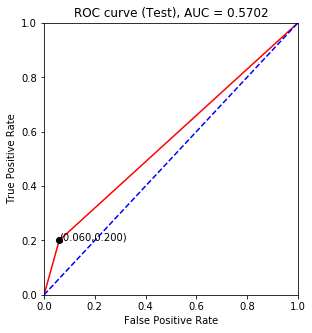

In [147]:
plot_ROC(y_test,y_pred)

Sobre el modelo equilibrado

In [148]:
y_pred = gnb_3.predict(X_test)

In [149]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,568,522
1,12,63


Test Accuracy: 0.5416309012875536 
Test AUC: 0.6805504587155964 
Test Confusion Matrix:

[[568 522]
 [ 12  63]]

probabilibad de acierto clase 0: (52.110)
probabilibad de acierto clase 1: (84.000)


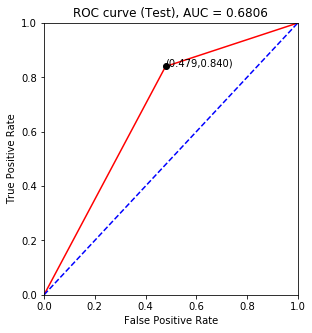

In [150]:
plot_ROC(y_test,y_pred)

## Deep learning

Mediante al librería keras vamos a realizar un pequeño estudio sobre la utiliozación de las redes neuronales para la resolución 
de este problema.

In [151]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [152]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


Preparamos el conjunto de datos para trabajar con el.

In [424]:
df = pd.read_csv('./ticdata2000.txt', sep="\t")

In [425]:
df.columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD','MGODRK','MGODPR','MGODOV',
              'MGODGE','MRELGE','MRELSA','MRELOV','MFALLEEN','MFGEKIND','MFWEKIND',
              'MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBER','MBERMIDD',
              'MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP',
              'MAUT1','MAUT2','MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512',
              'MINK123M','MINKGEM','MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT',
              'PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN','PPERSONG','PGEZONG',
              'PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
              'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM',
              'ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED',
              'ABYSTAND','CARAVAN']

In [426]:
y = df['CARAVAN']

In [427]:
df2 = df.loc[:, df.columns != 'CARAVAN']

In [428]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2)

In [429]:
X_train = X_train[['MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABYSTAND','ABROM','ALEVEN','ABRAND','APLEZIER']]

X_test = X_test[['MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABYSTAND','ABROM','ALEVEN','ABRAND','APLEZIER']]

In [430]:
X = X_train.values
Y = y_train.values

### Modelo 1

Probaremos con una sola capa y variamos le número de neuronas 64 y 10.

In [431]:
model1 = Sequential()
model1.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model1.fit(X, Y,
          epochs=20,
          batch_size=128, 
          verbose=0)
score = model1.evaluate(X, Y, batch_size=128)

4657/4657 [==============================] - 0s 32us/step


In [432]:
y_pred = model1.predict(X)

In [433]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)


In [434]:
clasificaciones = np.array(clasificaciones)

#### 10 neuronas

In [435]:
pd.crosstab(y_train, clasificaciones)

col_0,0
CARAVAN,
0,4372
1,285


In [436]:
X_Test = X_test.values

In [437]:
y_pred = model1.predict(X_Test)

In [438]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [439]:
clasificaciones = np.array(clasificaciones)

In [440]:
pd.crosstab(y_test, clasificaciones)

col_0,0
CARAVAN,
0,1102
1,63


Como vemos ninguno de estos modelos nos da un buen resultado, de hecho no encuentra ningún 1.


Vamos a probar con costes sensibles pero manteniendo sólo un layer, el desvalance es cercano a 1:15, por tanto, vamos a utilizar ese coste en las clases

In [170]:
model = Sequential()
model.add(Dense(45, input_dim=X.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X, Y,
          epochs=20,
          batch_size=128, 
          verbose=0,
          class_weight = {0: 1,
                1: 15.})
score = model.evaluate(X, Y, batch_size=128)

4657/4657 [==============================] - 0s 26us/step


In [171]:
y_pred = model.predict(X)

In [172]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [173]:
clasificaciones = np.array(clasificaciones)

#### 45 neuronas

In [174]:
pd.crosstab(y_train, clasificaciones)

col_0,0,1
CARAVAN,,
0,3019,1354
1,88,196


In [175]:
y_pred = model.predict(X_test)

In [176]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [177]:
clasificaciones = np.array(clasificaciones)

In [178]:
pd.crosstab(y_test, clasificaciones)

col_0,0,1
CARAVAN,,
0,747,354
1,22,42


Como vemos este modelo ya funciona algo mejor que los anteriores tanto en train como en test.

### Modelo 4

Volvemos al problema sin igualar con costes desvalanceados

In [179]:
model4 = Sequential()
model4.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model4.add(Dense(100, input_dim=X.shape[1], activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model4.fit(X_train, y_train,
          epochs=30,
          batch_size=128, 
          verbose=0,
           class_weight = {0: 1,
                1: 3.}
          )
score = model4.evaluate(X, Y, batch_size=128)

4657/4657 [==============================] - 0s 30us/step


In [180]:
y_pred = model4.predict(X_test)

In [181]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [182]:
clasificaciones = np.array(clasificaciones)

### 64 neuronas / 100 neuronas

In [183]:
pd.crosstab(y_test, clasificaciones)

col_0,0,1
CARAVAN,,
0,1089,12
1,60,4


El resultado sobre los datos de test se mantien. Obteniendo resultados significativos en el caso del modelo equilibrado

# Aplicamos validacion cruzada sobre los modelos seleccionados

Basandonos en el area que queda bajo la curva

LR: 0.737402 (0.037532)
KNN: 0.526049 (0.025948)
RF: 0.638296 (0.043451)
NB: 0.702851 (0.040919)
SVM: 0.736495 (0.044732)


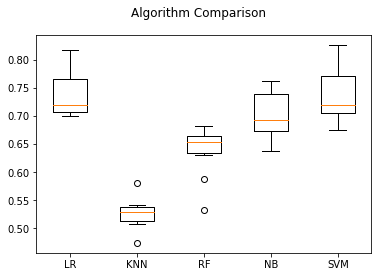

In [184]:

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

X = df2
Y = y
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB(priors=[.1, .9])))
models.append(('SVM', SVC(kernel='linear', class_weight={1: 15})))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Si tomamos como medida para determinar si tenemos un buen modelo o no en F1, siendo F1 = 2 * (precision * recall) / (precision + recall) obtenemos los siguientes resultados

LR: 0.010977 (0.021978)
KNN: 0.106838 (0.052524)
RF: 0.070296 (0.039565)
NB: 0.120415 (0.012435)
SVM: 0.202052 (0.035505)


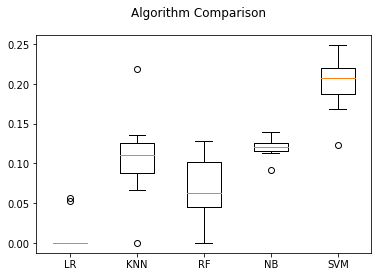

In [185]:

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# load dataset

X = df2
Y = y
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB(priors=[.1, .9])))
models.append(('SVM', SVC(kernel='linear', class_weight={1: 15})))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Se puede obsevar que los valores que obtenemos son muy bajos

Logistic:
	Precision: 0.333
	Recall: 0.016
	F1: 0.030

Naive Bayes:
	Precision: 0.089
	Recall: 0.797
	F1: 0.160

KNeighbors:
	Precision: 0.237
	Recall: 0.141
	F1: 0.176

Support Vector Classification:
	Precision: 0.120
	Recall: 0.703
	F1: 0.205

Random Forest:
	Precision: 0.200
	Recall: 0.016
	F1: 0.029



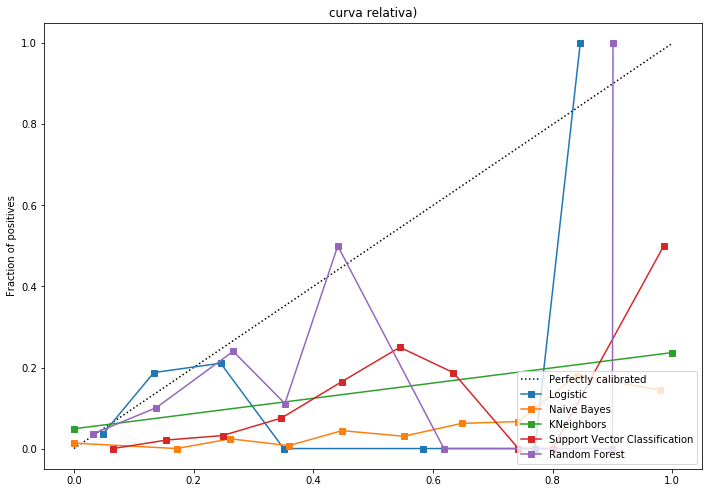

In [186]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')


lr = LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1)
rfc = RandomForestClassifier()
gnb = GaussianNB(priors=[.1, .9])
svc = SVC(kernel='linear', class_weight={1: 15})

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (knn, 'KNeighbors'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))
    
    print("%s:" % name)
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('curva relativa)')


plt.tight_layout()
plt.show()


# DATOS BALANCEADOS SMOTE

Dado que tenemos datos balanceados, se va a interar aplicar los modelos sobre un conjunto de datos balanceado mediante SMOTE

In [187]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [188]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [189]:
print('Resampled dataset shape {}'.format(Counter(y_res)))


Resampled dataset shape Counter({0: 4373, 1: 4373})


In [190]:
len(X_res)

8746

## Regresion logistica

In [191]:
logistic_2 = logreg.fit(X_res, y_res)

In [192]:
y_pred = logistic_2.predict(X_res)

In [193]:
pd.crosstab(y_res, y_pred)

col_0,0,1
row_0,,
0,2892,1481
1,1289,3084


Test Accuracy: 0.6832837868739995 
Test AUC: 0.6832837868739994 
Test Confusion Matrix:

[[2892 1481]
 [1289 3084]]

probabilibad de acierto clase 0: (66.133)
probabilibad de acierto clase 1: (70.524)


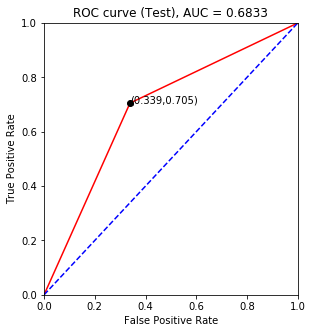

In [194]:
plot_ROC(y_res, y_pred)

### Resultados sobre test

In [195]:
y_pred = logistic_2.predict(X_test)

In [196]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,729,372
1,19,45


Test Accuracy: 0.6643776824034334 
Test AUC: 0.6826251702997276 
Test Confusion Matrix:

[[729 372]
 [ 19  45]]

probabilibad de acierto clase 0: (66.213)
probabilibad de acierto clase 1: (70.312)


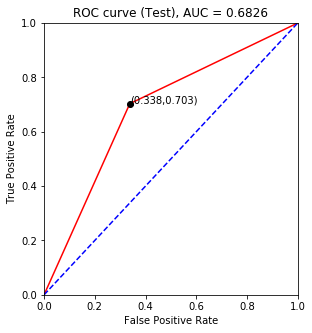

In [197]:
plot_ROC(y_test, y_pred)

Se obtienen muchos mejores resultados que sin balancear los datos

## Random forest

In [198]:
rf_2 = rf.fit(X_res, y_res)

In [199]:
y_pred = rf_2.predict(X_res)

In [200]:
pd.crosstab(y_res, y_pred)

col_0,0,1
row_0,,
0,3327,1046
1,627,3746


Test Accuracy: 0.808712554310542 
Test AUC: 0.8087125543105419 
Test Confusion Matrix:

[[3327 1046]
 [ 627 3746]]

probabilibad de acierto clase 0: (76.080)
probabilibad de acierto clase 1: (85.662)


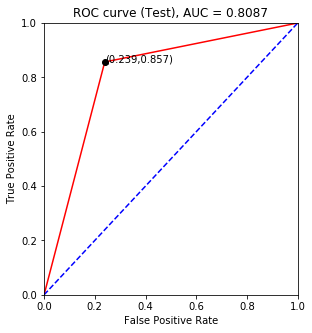

In [201]:
plot_ROC(y_res, y_pred)

### Resultados sobre test

In [202]:
y_pred = rf_2.predict(X_test)

In [203]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,838,263
1,33,31


Test Accuracy: 0.7459227467811159 
Test AUC: 0.6227506244323343 
Test Confusion Matrix:

[[838 263]
 [ 33  31]]

probabilibad de acierto clase 0: (76.113)
probabilibad de acierto clase 1: (48.438)


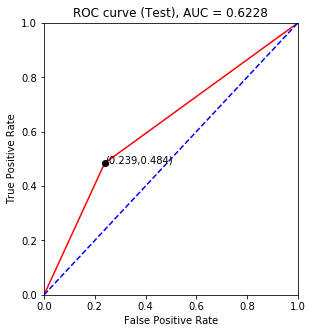

In [204]:
plot_ROC(y_test, y_pred)

Aunque sobre los datos de train se obtienen unos resultados muy buenos, cuando se aplica el modelo a los datos de test, el rendimiento del modelo baja

## Kneighbors

In [205]:
nei_2 = neigh.fit(X_res, y_res) 

In [206]:
y_pred = nei_2.predict( X_res)

In [207]:
pd.crosstab(y_res, y_pred)

col_0,0,1
row_0,,
0,3302,1071
1,1264,3109


Test Accuracy: 0.7330208095129201 
Test AUC: 0.7330208095129203 
Test Confusion Matrix:

[[3302 1071]
 [1264 3109]]

probabilibad de acierto clase 0: (75.509)
probabilibad de acierto clase 1: (71.095)


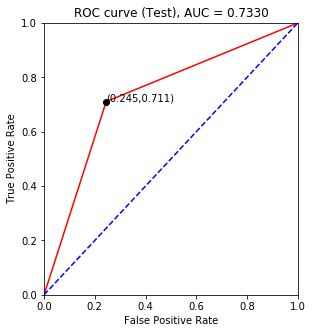

In [208]:
plot_ROC(y_res, y_pred)

### Resultados sobre test

In [209]:
y_pred = nei_2.predict(X_test)

In [210]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,821,280
1,40,24


Test Accuracy: 0.7253218884120172 
Test AUC: 0.5603428701180745 
Test Confusion Matrix:

[[821 280]
 [ 40  24]]

probabilibad de acierto clase 0: (74.569)
probabilibad de acierto clase 1: (37.500)


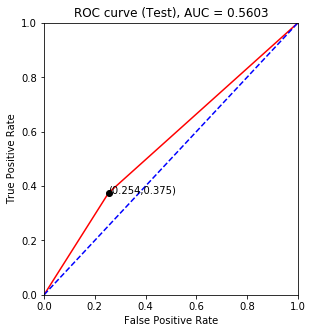

In [211]:
plot_ROC(y_test, y_pred)

Al igual que en caso del modelo random forest el modelo sobre los datos de test son muy buenos, pero sobre los datos de test el rendimiento cae en picado. Se obtienen resultados muy dependientes de los datos, se cae en el sobreentrenamiento

## SVM

In [212]:
clf = svm.SVC(kernel='linear')
clf_3 =clf.fit(X_res, y_res)

In [213]:
y_pred = clf_3.predict(X_res)

In [214]:
pd.crosstab(y_res, y_pred)

col_0,0,1
row_0,,
0,2240,2133
1,889,3484


Test Accuracy: 0.6544706151383489 
Test AUC: 0.654470615138349 
Test Confusion Matrix:

[[2240 2133]
 [ 889 3484]]

probabilibad de acierto clase 0: (51.223)
probabilibad de acierto clase 1: (79.671)


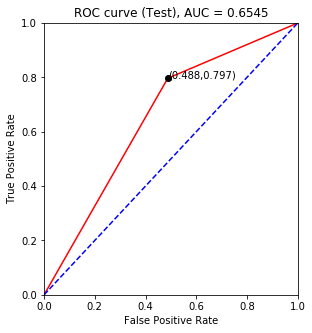

In [215]:
plot_ROC(y_res, y_pred)

### Resultados sobre test

In [216]:
y_pred = clf_3.predict(X_test)

In [217]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,554,547
1,13,51


Test Accuracy: 0.51931330472103 
Test AUC: 0.650026964123524 
Test Confusion Matrix:

[[554 547]
 [ 13  51]]

probabilibad de acierto clase 0: (50.318)
probabilibad de acierto clase 1: (79.688)


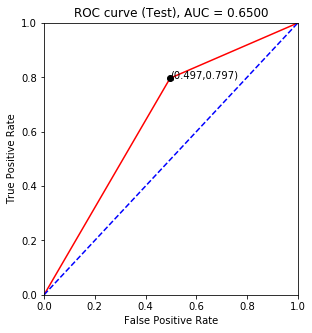

In [218]:
plot_ROC(y_test, y_pred)

El modelo basado en SVM con kernel lineal, matiene su comportamiento tanto en los datos de training como en los de test, no siendo un modelo descartable

### SVM Lineal con pesos

No tiene sentido aplicar este modelo, ya que se han equilibrado los datos

### SVM Kernel rbf

In [219]:
clfrbf = svm.SVC(kernel='rbf')
clf_4 = clfrbf.fit(X_train, y_train)

In [220]:
y_pred = clf_4.predict(X_res)

In [221]:
pd.crosstab(y_res, y_pred)

col_0,0
row_0,
0,4373
1,4373


Test Accuracy: 0.5 
Test AUC: 0.5 
Test Confusion Matrix:

[[4373    0]
 [4373    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


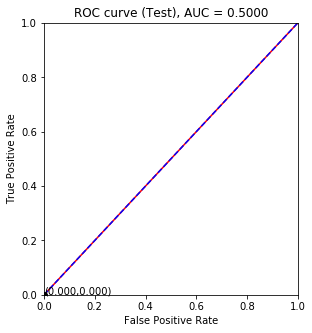

In [222]:
plot_ROC(y_res, y_pred)

### Resultados sobre test

In [223]:
y_pred = clf_4.predict(X_test)

In [224]:
pd.crosstab(y_test, y_pred)

col_0,0
CARAVAN,
0,1101
1,64


Test Accuracy: 0.9450643776824035 
Test AUC: 0.5 
Test Confusion Matrix:

[[1101    0]
 [  64    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


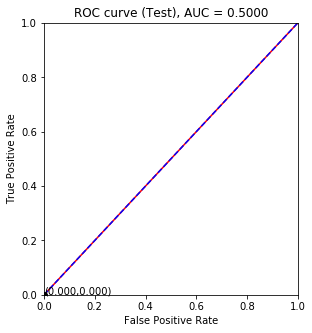

In [225]:
plot_ROC(y_test, y_pred)

Se obtiene un modelo donde solo se clasifican las muestras a una opcion de la salida. No aporta nada

## Naibe Bayes

In [226]:
gnb_2 = gnb.fit(X_res, y_res)


In [227]:
y_pred = gnb_2.predict(X_res)

In [228]:
pd.crosstab(y_res, y_pred)

col_0,0,1
row_0,,
0,581,3792
1,195,4178


Test Accuracy: 0.5441344614680997 
Test AUC: 0.5441344614680996 
Test Confusion Matrix:

[[ 581 3792]
 [ 195 4178]]

probabilibad de acierto clase 0: (13.286)
probabilibad de acierto clase 1: (95.541)


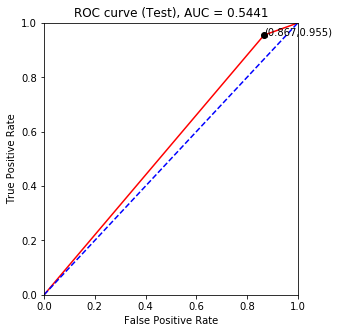

In [229]:
plot_ROC(y_res, y_pred)

### Resultados sobre test

In [230]:
y_pred = gnb_2.predict(X_test)

In [231]:
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,147,954
1,1,63


Test Accuracy: 0.18025751072961374 
Test AUC: 0.5589449931880108 
Test Confusion Matrix:

[[147 954]
 [  1  63]]

probabilibad de acierto clase 0: (13.351)
probabilibad de acierto clase 1: (98.438)


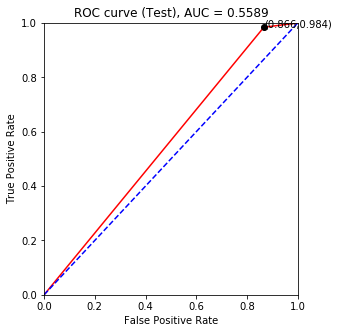

In [232]:
plot_ROC(y_test, y_pred)

Pasa lo mismo que con los datos desbalanceados, clasifica la mayoria como la clase minoritaria. No aporta valor

## Deep learning

Mediante al librería keras vamos a realizar un pequeño estudio sobre la utiliozación de las redes neuronales para la resolución 
de este problema.

### Modelo 2

La siguiente opción es balancear el dataset de entrenamiento.

In [233]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [234]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [235]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 4373, 1: 4373})


In [236]:
X = X_res
Y = y_res

In [237]:
model2 = Sequential()
model2.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model2.fit(X, Y,
          epochs=30,
          batch_size=128, 
          verbose=0)
score = model2.evaluate(X, Y, batch_size=128)

8746/8746 [==============================] - 0s 28us/step


In [238]:
y_pred = model2.predict(X)

In [239]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [240]:
clasificaciones = np.array(clasificaciones)

#### 50 neuronas, 30 epoch¶

In [241]:
pd.crosstab(y_res, clasificaciones)

col_0,0,1
row_0,,
0,2826,1547
1,992,3381


Probamos esta arquitectura sobre los datos de test:

In [242]:
y_pred = model2.predict(X_test)

In [243]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [244]:
clasificaciones = np.array(clasificaciones)

In [245]:
pd.crosstab(y_test, clasificaciones)

col_0,0,1
CARAVAN,,
0,675,426
1,21,43


### Modelo 3

Vamos ahora a seguir por esta via con datos balanceados pero introduciendo un segundo layer

In [246]:
model3 = Sequential()
model3.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model3.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model3.fit(X, Y,
          epochs=30,
          batch_size=128, 
          verbose=0)
score = model3.evaluate(X, Y, batch_size=128)

8746/8746 [==============================] - 0s 27us/step


In [247]:
y_pred = model3.predict(X_test)

In [248]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [249]:
clasificaciones = np.array(clasificaciones)

#### 10 neuronas / 10 neuronas

In [250]:
pd.crosstab(y_test, clasificaciones)

col_0,0,1
CARAVAN,,
0,706,395
1,21,43


# Aplicamos validacion cruzada sobre los modelos seleccionados

Si tomamos como medida para determinar si tenemos un buen modelo o no en F1, siendo F1 = 2 * (precision * recall) / (precision + recall) obtenemos los siguientes resultados

LR: 0.464656 (0.282650)
KNN: 0.493052 (0.298421)
RF: 0.533910 (0.325657)
NB: 0.458351 (0.254487)
SVC: 0.469960 (0.303344)


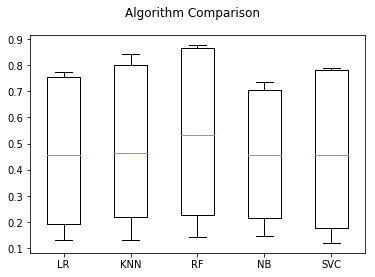

In [251]:

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

X = X_res
Y = y_res
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(kernel='linear')))

# models.append(('SVM', SVC(kernel='linear', class_weight={1: 15})))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Se puede obsevar que los valores que obtenemos se han incrementado respecto a los modelos basados en los datos originales

Logistic:
	Precision: 0.108
	Recall: 0.703
	F1: 0.187

Naive Bayes:
	Precision: 0.118
	Recall: 0.672
	F1: 0.201

KNeighbors:
	Precision: 0.079
	Recall: 0.375
	F1: 0.130

Support Vector Classification:
	Precision: 0.085
	Recall: 0.797
	F1: 0.154

Random Forest:
	Precision: 0.115
	Recall: 0.469
	F1: 0.185



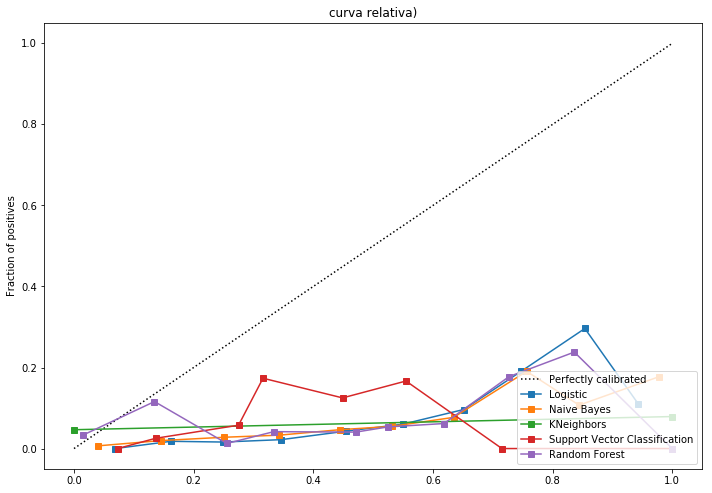

In [252]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
np.random.seed(0)


lr = LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1)
rfc = RandomForestClassifier()
gnb = GaussianNB()
svc = SVC(kernel='linear')

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (knn, 'KNeighbors'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
       
    print("%s:" % name)
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
    
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('curva relativa)')


plt.tight_layout()
plt.show()

# DATOS BALANCEADOS SUBMUESTREANDO

Se van a ir creando modelos con diferentes tamaños de submuestreo, con la finalidad de identificar el punto obtimo de submiestreo. Para cada tamaño de submiestreo se realizaran varias iteraciones quedandonos con el valor medio. Una vez identificado el punto obtimo se generara el modelo con el tamaño de submuestreo identificado y se contrastará el modelo con los datos de test

In [253]:
from imblearn.datasets import make_imbalance
import warnings
warnings.filterwarnings('ignore')


In [254]:
def median(lista):
    lista_ordenada = sorted(lista)
    mitad = len(lista_ordenada) / 2 
    
    #Comprobamos si el total de elementos es par
    if len(lista_ordenada) % 2 == 0:
        media = (lista_ordenada[mitad] + lista_ordenada[mitad-1]) / 2.0
    else:
        media = lista_ordenada[int(mitad)]
    
    return media



In [255]:
def iteracion(metodo): 

    Tminotiraria = np.array([])
    Tmayoritaria = np.array([])
    x =  np.arange(100,3000,50)


    for i in x:

        Lminotiraria = np.array([])
        Lmayoritaria = np.array([])
        y = range(1,10)

        for j in y: 

            X_under, y_under = make_imbalance(X_train, y_train, ratio={0: i, 1: 260}, random_state=0)
            
            if metodo == 'logreg':
               modelo =logreg.fit(X_under, y_under)
            elif metodo == 'rf':
               modelo =rf.fit(X_under, y_under)
            elif metodo == 'neigh':
               modelo =neigh.fit(X_under, y_under)   
            elif metodo == 'gnb':
               modelo = gnb.fit(X_under, y_under)   
            elif metodo == 'clfrbf':
               modelo = clfrbf.fit(X_under, y_under)   
            
            else: pass               
            y_pred = modelo.predict(X_test)

            tabla = pd.crosstab(y_test, y_pred)

            mayoritaria = tabla[0][0] / (tabla[0][0] + tabla[1][0])

            Lmayoritaria = np.append(Lmayoritaria,mayoritaria)

            minotiraria = tabla[1][1]  / (tabla[0][1] + tabla[1][1])

            Lminotiraria = np.append(Lminotiraria,minotiraria)

        Tminotiraria = np.append(Tminotiraria,median(Lminotiraria))
        Tmayoritaria = np.append(Tmayoritaria,median(Lmayoritaria))
    
    return x, Tminotiraria, Tmayoritaria

In [256]:

# representación gráfica
def plot_iteracion(x,Tminotiraria,Tmayoritaria):
    
    idx=np.argwhere(np.diff(np.sign(Tmayoritaria - Tminotiraria )) != 0).reshape(-1) + 0
    plt.plot(x, Tmayoritaria)
    plt.plot(x, Tminotiraria)
    for i in range(len(idx)):
            plt.plot((x[idx[i]]+x[idx[i]+1])/2.,(Tmayoritaria[idx[i]]+Tmayoritaria[idx[i]+1]+Tminotiraria[idx[i]]+Tminotiraria[idx[i]+1])/4., 'ro')
    plt.legend(['No contratan', 'Contratan'])
    plt.ylabel("Porcentaje de acierto")
    plt.xlabel("Numero de elementos de la clase mayoritaria")
    plt.title("Punto de máxima ganancia")
    plt.show()  

    for i in range(len(idx)):
        print("Numero de elementos que maximiza la ganancia: %s " %str((x[idx[i]]+x[idx[i]+1])/2.))

## Regresión logística

In [257]:
x,Min_logreg, Max_logreg = iteracion('logreg')

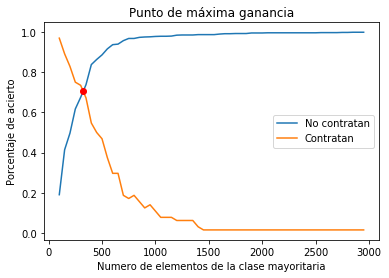

Numero de elementos que maximiza la ganancia: 325.0 


In [258]:
plot_iteracion(x,Min_logreg, Max_logreg)

Con los parametros identificados como idóneos:

In [259]:
X_under, y_under = make_imbalance(X_train, y_train, ratio={0: 275, 1: 260}, random_state=0)
logistic_3 =logreg.fit(X_under, y_under)
y_pred = logistic_3.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,683,418
1,16,48


Test Accuracy: 0.6274678111587982 
Test AUC: 0.685172570390554 
Test Confusion Matrix:

[[683 418]
 [ 16  48]]

probabilibad de acierto clase 0: (62.035)
probabilibad de acierto clase 1: (75.000)


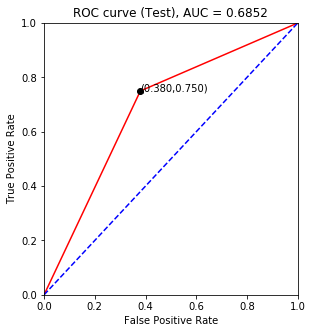

In [260]:
plot_ROC(y_test,y_pred)

## Random Forest

In [261]:
x,Min_rf, Max_rf = iteracion('rf')

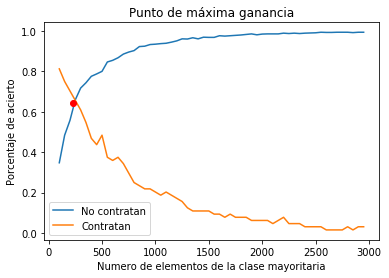

Numero de elementos que maximiza la ganancia: 225.0 


In [262]:
plot_iteracion(x,Min_rf, Max_rf)

Con los parametros identificados como idóneos:

In [263]:
X_under, y_under = make_imbalance(X_train, y_train, ratio={0: 275, 1: 260}, random_state=0)
rf_3 =rf.fit(X_under, y_under)
y_pred = rf_3.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,750,351
1,25,39


Test Accuracy: 0.6772532188841202 
Test AUC: 0.645286955040872 
Test Confusion Matrix:

[[750 351]
 [ 25  39]]

probabilibad de acierto clase 0: (68.120)
probabilibad de acierto clase 1: (60.938)


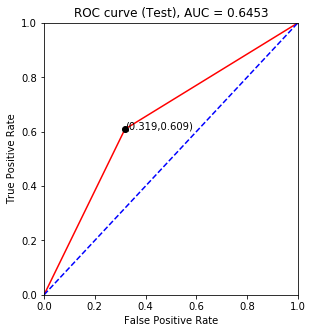

In [264]:
plot_ROC(y_test,y_pred)

## Kneighbors

In [265]:
x,Min_neigh, Max_neigh = iteracion('neigh')

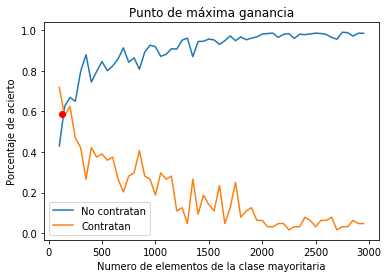

Numero de elementos que maximiza la ganancia: 125.0 


In [266]:
plot_iteracion(x,Min_neigh, Max_neigh)

Con los parametros identificados como idóneos:

In [267]:
X_under, y_under = make_imbalance(X_train, y_train, ratio={0: 275, 1: 260}, random_state=0)
ne1_4 =neigh.fit(X_under, y_under)
y_pred = ne1_4.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,776,325
1,31,33


Test Accuracy: 0.6944206008583691 
Test AUC: 0.610219402815622 
Test Confusion Matrix:

[[776 325]
 [ 31  33]]

probabilibad de acierto clase 0: (70.481)
probabilibad de acierto clase 1: (51.562)


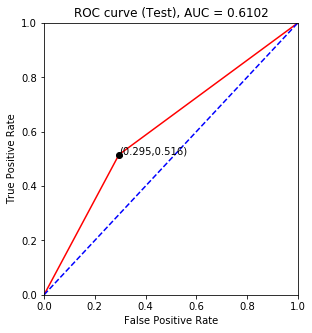

In [268]:
plot_ROC(y_test,y_pred)

## Naive Bayes

In [269]:
x, Min_gnb, Max_gnb = iteracion('gnb')

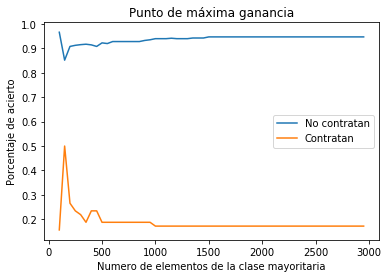

In [270]:
plot_iteracion(x, Min_gnb, Max_gnb)

In [271]:
X_under, y_under = make_imbalance(X_train, y_train, ratio={0: 275, 1: 260}, random_state=0)
gnb_4 =gnb.fit(X_under, y_under)
y_pred = gnb_4.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
CARAVAN,,
0,1001,100
1,49,15


Test Accuracy: 0.8721030042918455 
Test AUC: 0.5717742393278837 
Test Confusion Matrix:

[[1001  100]
 [  49   15]]

probabilibad de acierto clase 0: (90.917)
probabilibad de acierto clase 1: (23.438)


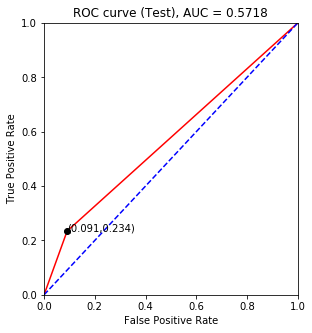

In [272]:
plot_ROC(y_test,y_pred)

### Modelo 2

La siguiente opción es balancear el dataset de entrenamiento.

In [273]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [274]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [275]:
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 4373, 1: 4373})


In [276]:
X = X_res
Y = y_res

In [277]:
model2 = Sequential()
model2.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model2.fit(X, Y,
          epochs=30,
          batch_size=128, 
          verbose=0)
score = model2.evaluate(X, Y, batch_size=128)

8746/8746 [==============================] - 0s 20us/step


In [278]:
y_pred = model2.predict(X)

In [279]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [280]:
clasificaciones = np.array(clasificaciones)

#### 50 neuronas, 30 epoch¶

In [281]:
pd.crosstab(y_res, clasificaciones)

col_0,0,1
row_0,,
0,3093,1280
1,1333,3040


Probamos esta arquitectura sobre los datos de test:

In [282]:
y_pred = model2.predict(X_test)

In [283]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [284]:
clasificaciones = np.array(clasificaciones)

In [285]:
pd.crosstab(y_test, clasificaciones)

col_0,0,1
CARAVAN,,
0,730,371
1,25,39


### Modelo 3

Vamos ahora a seguir por esta via con datos balanceados pero introduciendo un segundo layer

In [286]:
model3 = Sequential()
model3.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model3.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model3.fit(X, Y,
          epochs=30,
          batch_size=128, 
          verbose=0)
score = model3.evaluate(X, Y, batch_size=128)

8746/8746 [==============================] - 0s 21us/step


In [287]:
y_pred = model3.predict(X_test)

In [288]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [289]:
clasificaciones = np.array(clasificaciones)

#### 10 neuronas / 10 neuronas

In [290]:
pd.crosstab(y_test, clasificaciones)

col_0,0,1
CARAVAN,,
0,693,408
1,23,41


# Aplicamos validacion cruzada sobre los modelos seleccionados

Si tomamos como medida para determinar si tenemos un buen modelo o no en F1, siendo F1 = 2 * (precision * recall) / (precision + recall) obtenemos los siguientes resultados

LR: 0.377439 (0.378582)
KNN: 0.303964 (0.306302)
NB: 0.164096 (0.164359)
RF: 0.363768 (0.365232)


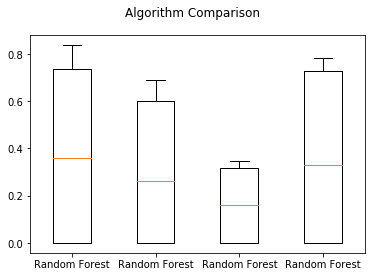

In [291]:

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
results = []
names = []
scoring = 'f1'


X, Y = make_imbalance(X_train, y_train, ratio={0: 275, 1: 260}, random_state=0)

kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(logreg, X, Y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % ('LR', cv_results.mean(), cv_results.std())
print(msg)


kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(neigh, X, Y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
print(msg)

kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(gnb, X, Y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % ('NB', cv_results.mean(), cv_results.std())
print(msg)

kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(rf, X, Y, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % ('RF', cv_results.mean(), cv_results.std())
print(msg)


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Automatically created module for IPython interactive environment
Logistic:
	Precision: 0.103
	Recall: 0.750
	F1: 0.181

Neigh:
	Precision: 0.092
	Recall: 0.516
	F1: 0.156

Random Forest:
	Precision: 0.096
	Recall: 0.562
	F1: 0.164

Naive Bayes:
	Precision: 0.130
	Recall: 0.234
	F1: 0.168



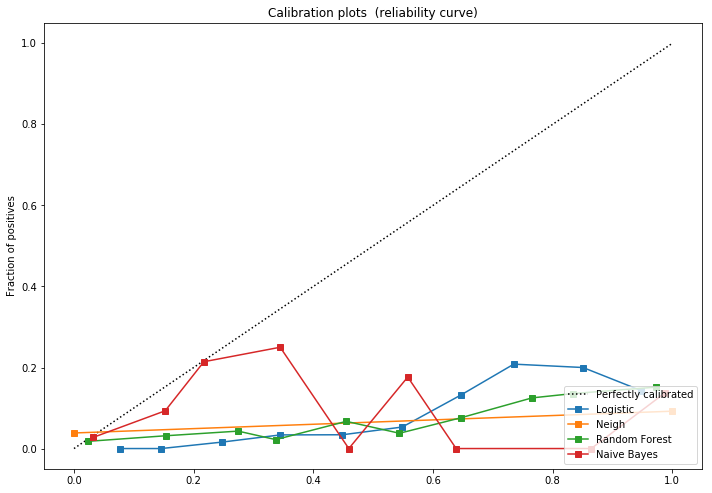

In [292]:
print(__doc__)

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)


ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (neigh, 'Neigh'),
                  (rfc, 'Random Forest'),
                  (gnb, 'Naive Bayes')]:
    
    X_under, y_under = make_imbalance(X_train, y_train, ratio={0: 275, 1: 260}, random_state=0)        
 
    
    clf.fit(X_under, y_under)
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
            
    print("%s:" % name)
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
    
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')



plt.tight_layout()
plt.show()

# EVALUACION DE MODELOS SOBRE EL GRUPO DE TEST AUXILIAR

En primera instancia se realiza un análisis de la bondad de los modelos, basandonos en la medida F1 de los modelos, sobre los que se ha realizad una validación cruzada.

En este escenario primero se realizará una comparación por modelo y las tres prosibilidades analizadas:
- Datos originales
- Datos equilibrados con SMOTE
- Datos equilibrados con submuestreo

Se obtiene el nuevo juego de datos

In [293]:
df2 = pd.read_csv('./ticeval2000.txt', sep="\t")

In [294]:

warnings.filterwarnings('ignore')

X_test_final = df2.ix[:, 42:]

Se aplican las modificaciones al conjunto de variables finales

In [295]:
X_test_final.columns = ['MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR',
                             'PWERKT','PBROM','PLEVEN', 'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART'
                             ,'AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM',
                              'ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND']

In [296]:
X_test_final = X_test_final[['MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABYSTAND','ABROM','ALEVEN','ABRAND','APLEZIER']]

In [297]:
y_test_final = pd.read_csv('./tictgts2000.txt')

In [298]:
y_test_final = np.array(y_test_final['0'].tolist())

### Regresión logística

LR ORIGINAL: 0.000000 (0.000000)
LR SMOTE: 0.464656 (0.282650)
LR SUB: 0.377439 (0.378582)


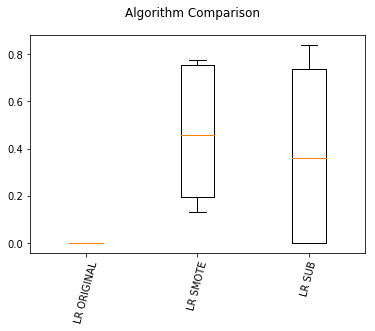

In [299]:

import warnings
warnings.filterwarnings('ignore')

X1 = X_train
Y1 = y_train

X2 = X_res
Y2 = y_res

X3 = X_under
Y3 = y_under

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
# models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
# models.append(('SVCL', SVC(kernel='linear')))
# models.append(('SVCWL', SVC(kernel='linear', class_weight={1: 15})))
# models.append(('SVCRBF', SVC(kernel='rbf')))
# models.append(('NB', GaussianNB()))
# models.append(('NBW', GaussianNB(priors=[.1, .9])))

results_global = []
names_global = []
results = []
names = []
scoring = 'f1'
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' ORIGINAL')
    names_global.append(name + ' ORIGINAL')
    msg = "%s: %f (%f)" % (name  + ' ORIGINAL', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' SMOTE')
    names_global.append(name + ' SMOTE')
    msg = "%s: %f (%f)" % (name + ' SMOTE', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name  + ' SUB')
    names_global.append(name + ' SUB')
    msg = "%s: %f (%f)" % (name    + ' SUB', cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=75)
plt.show()

### Ramdom Forest

RF ORIGINAL: 0.068896 (0.042346)
RF SMOTE: 0.532583 (0.326802)
RF SUB: 0.361613 (0.364131)


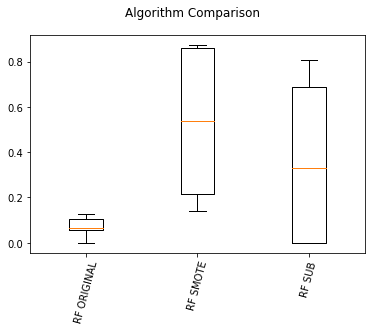

In [300]:

import warnings
warnings.filterwarnings('ignore')

X1 = X_train
Y1 = y_train

X2 = X_res
Y2 = y_res

X3 = X_under
Y3 = y_under

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
# models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
# models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
# models.append(('SVCL', SVC(kernel='linear')))
# models.append(('SVCWL', SVC(kernel='linear', class_weight={1: 15})))
# models.append(('SVCRBF', SVC(kernel='rbf')))
# models.append(('NB', GaussianNB()))
# models.append(('NBW', GaussianNB(priors=[.1, .9])))


results = []
names = []
scoring = 'f1'
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' ORIGINAL')
    names_global.append(name + ' ORIGINAL')
    msg = "%s: %f (%f)" % (name  + ' ORIGINAL', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' SMOTE')
    names_global.append(name + ' SMOTE')
    msg = "%s: %f (%f)" % (name + ' SMOTE', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name  + ' SUB')
    names_global.append(name + ' SUB')
    msg = "%s: %f (%f)" % (name    + ' SUB', cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=75)
plt.show()

### K-nn

KNN ORIGINAL: 0.121107 (0.052290)
KNN SMOTE: 0.493052 (0.298421)
KNN SUB: 0.303964 (0.306302)
KNN3 ORIGINAL: 0.063821 (0.047104)
KNN3 SMOTE: 0.493122 (0.279583)
KNN3 SUB: 0.288592 (0.292479)


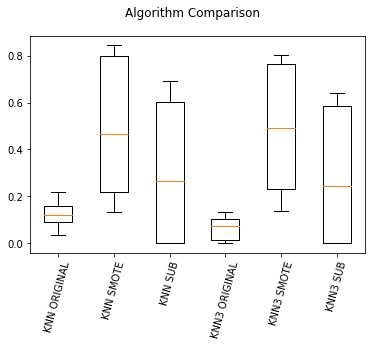

In [301]:

import warnings
warnings.filterwarnings('ignore')

X1 = X_train
Y1 = y_train

X2 = X_res
Y2 = y_res

X3 = X_under
Y3 = y_under

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
# models.append(('SVCL', SVC(kernel='linear')))
# models.append(('SVCWL', SVC(kernel='linear', class_weight={1: 15})))
# models.append(('SVCRBF', SVC(kernel='rbf')))
# models.append(('NB', GaussianNB()))
# models.append(('NBW', GaussianNB(priors=[.1, .9])))


results = []
names = []
scoring = 'f1'
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' ORIGINAL')
    names_global.append(name + ' ORIGINAL')
    msg = "%s: %f (%f)" % (name  + ' ORIGINAL', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' SMOTE')
    names_global.append(name + ' SMOTE')
    msg = "%s: %f (%f)" % (name + ' SMOTE', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name  + ' SUB')
    names_global.append(name + ' SUB')
    msg = "%s: %f (%f)" % (name    + ' SUB', cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=75)
plt.show()

### SVM

SVCL ORIGINAL: 0.000000 (0.000000)
SVCL SMOTE: 0.469960 (0.303344)
SVCL SUB: 0.378101 (0.380159)
SVCWL ORIGINAL: 0.206992 (0.024218)
SVCWL SMOTE: 0.539247 (0.428563)
SVCWL SUB: 0.495050 (0.495247)
SVCRBF ORIGINAL: 0.000000 (0.000000)
SVCRBF SMOTE: 0.499910 (0.300480)
SVCRBF SUB: 0.358073 (0.361342)


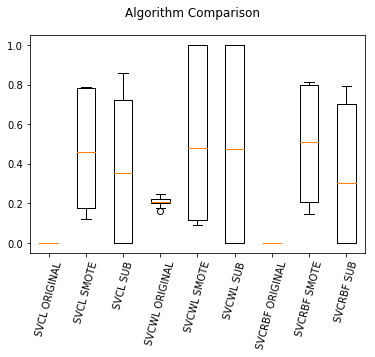

In [302]:

import warnings
warnings.filterwarnings('ignore')

X1 = X_train
Y1 = y_train

X2 = X_res
Y2 = y_res

X3 = X_under
Y3 = y_under

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
# models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVCL', SVC(kernel='linear')))
models.append(('SVCWL', SVC(kernel='linear', class_weight={1: 15})))
models.append(('SVCRBF', SVC(kernel='rbf')))
# models.append(('NB', GaussianNB()))
# models.append(('NBW', GaussianNB(priors=[.1, .9])))


results = []
names = []
scoring = 'f1'
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' ORIGINAL')
    names_global.append(name + ' ORIGINAL')
    msg = "%s: %f (%f)" % (name  + ' ORIGINAL', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' SMOTE')
    names_global.append(name + ' SMOTE')
    msg = "%s: %f (%f)" % (name + ' SMOTE', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name  + ' SUB')
    names_global.append(name + ' SUB')
    msg = "%s: %f (%f)" % (name    + ' SUB', cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=75)
plt.show()

### Naive Bayes

NB ORIGINAL: 0.154150 (0.051563)
NB SMOTE: 0.458351 (0.254487)
NB SUB: 0.164096 (0.164359)
NBW ORIGINAL: 0.177691 (0.031167)
NBW SMOTE: 0.532168 (0.412118)
NBW SUB: 0.375234 (0.377061)


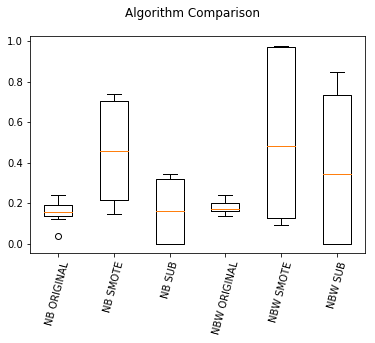

In [303]:

import warnings
warnings.filterwarnings('ignore')

X1 = X_train
Y1 = y_train

X2 = X_res
Y2 = y_res

X3 = X_under
Y3 = y_under

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
# models.append(('KNN3', KNeighborsClassifier(n_neighbors=3)))
# models.append(('SVCL', SVC(kernel='linear')))
# models.append(('SVCWL', SVC(kernel='linear', class_weight={1: 15})))
# models.append(('SVCRBF', SVC(kernel='rbf')))
models.append(('NB', GaussianNB()))
models.append(('NBW', GaussianNB(priors=[.1, .9])))


results = []
names = []
scoring = 'f1'
for name, model in models:

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X1, Y1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' ORIGINAL')
    names_global.append(name + ' ORIGINAL')
    msg = "%s: %f (%f)" % (name  + ' ORIGINAL', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2, Y2, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name + ' SMOTE')
    names_global.append(name + ' SMOTE')
    msg = "%s: %f (%f)" % (name + ' SMOTE', cv_results.mean(), cv_results.std())
    print(msg)

    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X3, Y3, cv=kfold, scoring=scoring)
    results.append(cv_results)
    results_global.append(cv_results)
    names.append(name  + ' SUB')
    names_global.append(name + ' SUB')
    msg = "%s: %f (%f)" % (name    + ' SUB', cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=75)
plt.show()

### Contraste de todos los modelos

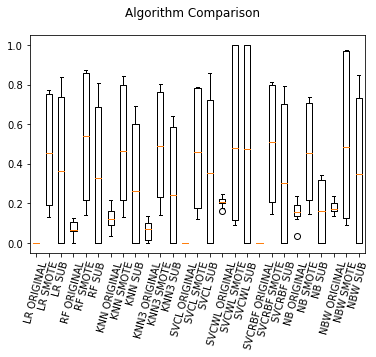

In [304]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_global)
ax.set_xticklabels(names_global, rotation=75)
plt.show()

## Se aplican los modelos sobre el juago de datos de test extra

### Regresión logisitica 

Datos originales

In [305]:
logistic_1 = logreg.fit(X_train, y_train)
y_pred = logistic_1.predict(X_test_final)
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,3757,4
1,237,1


Test Accuracy: 0.9397349337334333 
Test AUC: 0.5015690668716304 
Test Confusion Matrix:

[[3757    4]
 [ 237    1]]

probabilibad de acierto clase 0: (99.894)
probabilibad de acierto clase 1: (0.420)


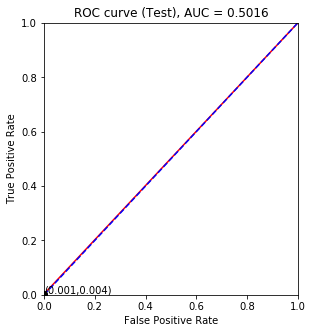

In [306]:
plot_ROC(y_test_final, y_pred)

In [307]:
F1_TEST =[]
F1_NAMES=[]
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('LR ORIGINAL')

Datos balanceados SMOTE

In [308]:
logistic_2 = logreg.fit(X_res, y_res)
y_pred = logistic_2.predict(X_test_final)
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2505,1256
1,93,145


Test Accuracy: 0.6626656664166042 
Test AUC: 0.6376449808852017 
Test Confusion Matrix:

[[2505 1256]
 [  93  145]]

probabilibad de acierto clase 0: (66.605)
probabilibad de acierto clase 1: (60.924)


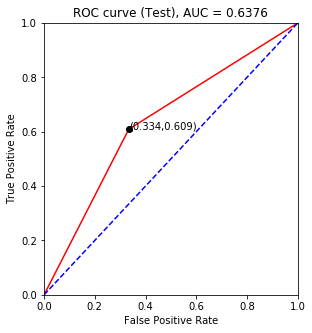

In [309]:
plot_ROC(y_test_final, y_pred)

In [310]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('LR SMOTE')

Datos balanceados submuestreando

In [311]:
logistic_3 =logreg.fit(X_under, y_under)
y_pred = logistic_3.predict(X_test_final)
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2386,1375
1,90,148


Test Accuracy: 0.6336584146036509 
Test AUC: 0.6281272413246075 
Test Confusion Matrix:

[[2386 1375]
 [  90  148]]

probabilibad de acierto clase 0: (63.441)
probabilibad de acierto clase 1: (62.185)


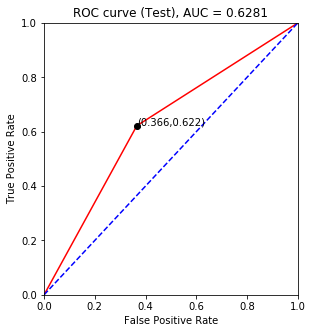

In [312]:
plot_ROC(y_test_final, y_pred)

In [313]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('LR SUB')

### Random forest

Datos originales

In [314]:
rf_1 =rf.fit(X_train, y_train)
y_pred = rf_1.predict(X_test_final)

In [315]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,3743,18
1,234,4


Test Accuracy: 0.9369842460615154 
Test AUC: 0.5060103807542692 
Test Confusion Matrix:

[[3743   18]
 [ 234    4]]

probabilibad de acierto clase 0: (99.521)
probabilibad de acierto clase 1: (1.681)


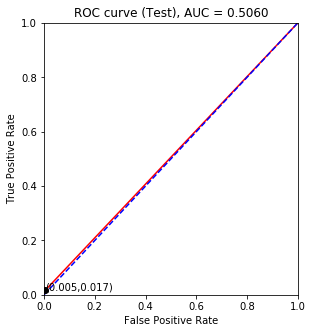

In [316]:
plot_ROC(y_test_final, y_pred)

In [317]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('RF ORIGINAL')

Datos balanceados con SMOTE

In [318]:
rf_3 =rf.fit(X_res, y_res)
y_pred = rf_2.predict(X_test_final)

In [319]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2850,911
1,138,100


Test Accuracy: 0.7376844211052763 
Test AUC: 0.5889726270726319 
Test Confusion Matrix:

[[2850  911]
 [ 138  100]]

probabilibad de acierto clase 0: (75.778)
probabilibad de acierto clase 1: (42.017)


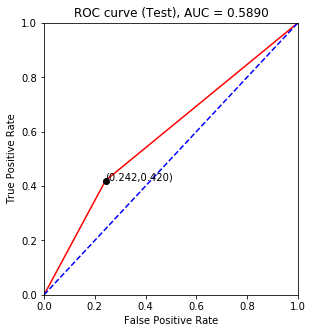

In [320]:
plot_ROC(y_test_final, y_pred)

In [321]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('RF SMOTE')

Datos balanceados submuestreando

In [322]:
rf_3 =rf.fit(X_under, y_under)
y_pred = rf_3.predict(X_test_final)

In [323]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2610,1151
1,102,136


Test Accuracy: 0.6866716679169792 
Test AUC: 0.6326964713032248 
Test Confusion Matrix:

[[2610 1151]
 [ 102  136]]

probabilibad de acierto clase 0: (69.396)
probabilibad de acierto clase 1: (57.143)


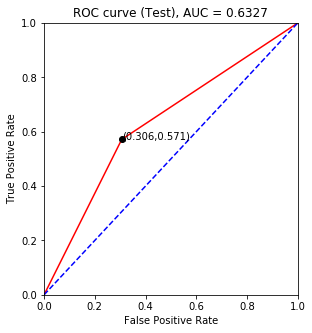

In [324]:
plot_ROC(y_test_final, y_pred)

In [325]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('RF SUB')

### K-nn

Datos orifinales

In [326]:
ne1_1 =neigh.fit(X_train, y_train)
y_pred = ne1_1.predict(X_test_final)

In [327]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,3673,88
1,215,23


Test Accuracy: 0.9242310577644411 
Test AUC: 0.5366203115120018 
Test Confusion Matrix:

[[3673   88]
 [ 215   23]]

probabilibad de acierto clase 0: (97.660)
probabilibad de acierto clase 1: (9.664)


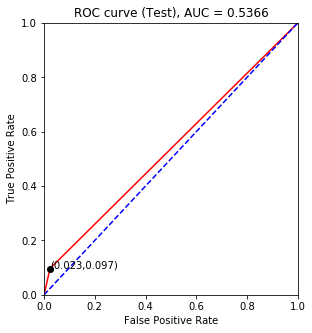

In [328]:
plot_ROC(y_test_final, y_pred)

In [329]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('KNN ORIGINAL')

Datos orifinales considerando 3 vecinos

In [330]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
ne1_3 = neigh3.fit(X_train, y_train) 
y_pred = ne1_3.predict(X_test_final)

In [331]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,3704,57
1,224,14


Test Accuracy: 0.929732433108277 
Test AUC: 0.5218339928366986 
Test Confusion Matrix:

[[3704   57]
 [ 224   14]]

probabilibad de acierto clase 0: (98.484)
probabilibad de acierto clase 1: (5.882)


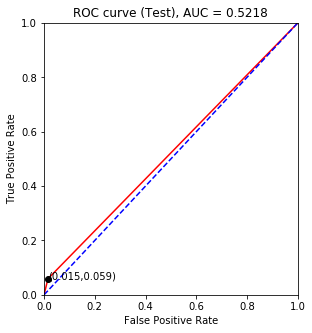

In [332]:
plot_ROC(y_test_final, y_pred)

In [333]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('KNN3 ORIGINAL')

Datos balanceados con SMOTE

In [334]:
nei_2 = neigh.fit(X_res, y_res) 
y_pred = nei_2.predict(X_test_final)

In [335]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2787,974
1,148,90


Test Accuracy: 0.719429857464366 
Test AUC: 0.5595887916453472 
Test Confusion Matrix:

[[2787  974]
 [ 148   90]]

probabilibad de acierto clase 0: (74.103)
probabilibad de acierto clase 1: (37.815)


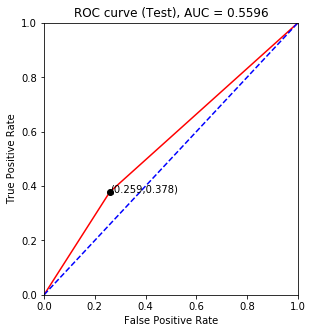

In [336]:
plot_ROC(y_test_final, y_pred)

In [337]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('KNN SMOTE')

Datos balanceados submuestreando

In [338]:
nei_4 = neigh.fit(X_under, y_under) 
y_pred = ne1_4.predict(X_test_final)

In [339]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2683,1078
1,105,133


Test Accuracy: 0.7041760440110028 
Test AUC: 0.6360988160220217 
Test Confusion Matrix:

[[2683 1078]
 [ 105  133]]

probabilibad de acierto clase 0: (71.337)
probabilibad de acierto clase 1: (55.882)


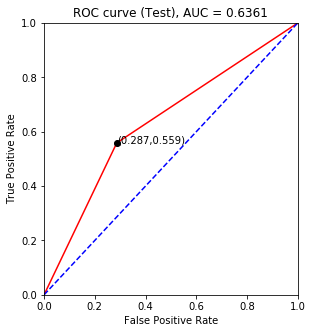

In [340]:
plot_ROC(y_test_final, y_pred)

In [341]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('KNN SUB')

### SVM

Datos orifinales SVM lineal

In [342]:
clf = svm.SVC(kernel='linear')
clf_1 = clf.fit(X_train, y_train)
y_pred = clf_1.predict(X_test_final)

In [343]:
pd.crosstab(y_test_final, y_pred)

col_0,0
row_0,
0,3761
1,238


Test Accuracy: 0.9404851212803201 
Test AUC: 0.5 
Test Confusion Matrix:

[[3761    0]
 [ 238    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


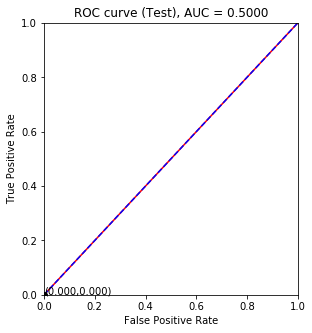

In [344]:
plot_ROC(y_test_final, y_pred)

In [345]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('SVM LINEAL ORIGINAL')

Datos orifinales SVM rdf

In [346]:
clf = svm.SVC(kernel='rbf')
clf_2 = clf.fit(X_train, y_train)
y_pred = clf_2.predict(X_test_final)

In [347]:
pd.crosstab(y_test_final, y_pred)

col_0,0
row_0,
0,3761
1,238


Test Accuracy: 0.9404851212803201 
Test AUC: 0.5 
Test Confusion Matrix:

[[3761    0]
 [ 238    0]]

probabilibad de acierto clase 0: (100.000)
probabilibad de acierto clase 1: (0.000)


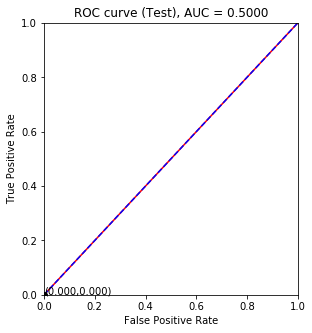

In [348]:
plot_ROC(y_test_final, y_pred)

In [349]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('SVM RBF ORIGINAL')

## Datos orifinales SVM costes

In [350]:
wclf = svm.SVC(kernel='linear', class_weight={1: 15})
wclf.fit(X_train, y_train)
y_pred = wclf.predict(X_test_final)

In [351]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2633,1128
1,96,142


Test Accuracy: 0.6939234808702176 
Test AUC: 0.6483592107409302 
Test Confusion Matrix:

[[2633 1128]
 [  96  142]]

probabilibad de acierto clase 0: (70.008)
probabilibad de acierto clase 1: (59.664)


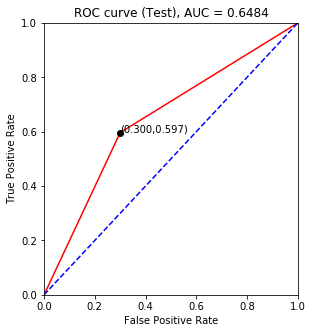

In [352]:
plot_ROC(y_test_final, y_pred)

In [353]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('SVM LINEAL COSTES ORIGINAL')

Datos nivelados con SMOTE SVM linal

In [354]:
clf = svm.SVC(kernel='linear')
clf_3 =clf.fit(X_res, y_res)
y_pred = clf_3.predict(X_test_final)

In [355]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,1930,1831
1,70,168


Test Accuracy: 0.5246311577894474 
Test AUC: 0.6095218730938268 
Test Confusion Matrix:

[[1930 1831]
 [  70  168]]

probabilibad de acierto clase 0: (51.316)
probabilibad de acierto clase 1: (70.588)


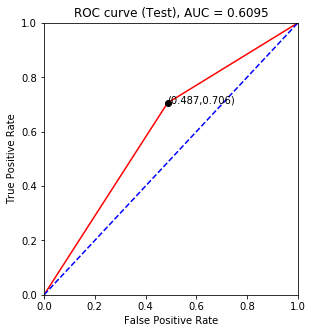

In [356]:
plot_ROC(y_test_final, y_pred)

In [357]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('SVM LINEAL SMOTE')

Datos nivelados con SMOTE SVM rdf

In [358]:
clfrbf = svm.SVC(kernel='rbf')
clf_4 = clfrbf.fit(X_res, y_res)
y_pred = clf_4.predict(X_test_final)

In [359]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2528,1233
1,99,139


Test Accuracy: 0.6669167291822956 
Test AUC: 0.6280976362892937 
Test Confusion Matrix:

[[2528 1233]
 [  99  139]]

probabilibad de acierto clase 0: (67.216)
probabilibad de acierto clase 1: (58.403)


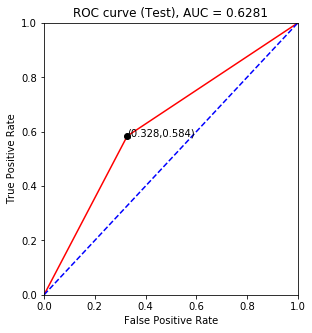

In [360]:
plot_ROC(y_test_final, y_pred)

In [361]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('SVM RBF SMOTE')

### Naive Bayes

Datos originales

In [362]:
gnb_1 = gnb.fit(X_train, y_train)
y_pred = gnb_1.predict(X_test_final)

In [363]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,3540,221
1,211,27


Test Accuracy: 0.891972993248312 
Test AUC: 0.5273422051617775 
Test Confusion Matrix:

[[3540  221]
 [ 211   27]]

probabilibad de acierto clase 0: (94.124)
probabilibad de acierto clase 1: (11.345)


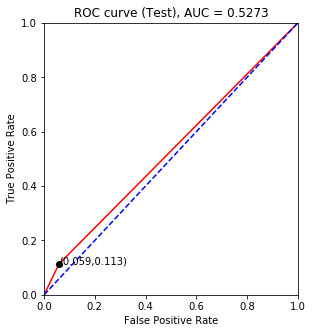

In [364]:
plot_ROC(y_test_final, y_pred)

In [365]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('NB ORIGINAL')

Datos originales con pesos

In [366]:
gnb2 = GaussianNB(priors=[.1, .9])
gnb_3 = gnb2.fit(X_train, y_train)
y_pred = gnb_3.predict(X_test_final)

In [367]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2075,1686
1,72,166


Test Accuracy: 0.5603900975243811 
Test AUC: 0.6245969805098321 
Test Confusion Matrix:

[[2075 1686]
 [  72  166]]

probabilibad de acierto clase 0: (55.171)
probabilibad de acierto clase 1: (69.748)


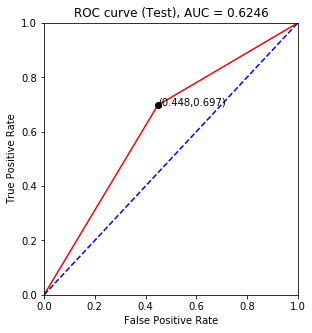

In [368]:
plot_ROC(y_test_final, y_pred)

In [369]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('NB PRIOR ORIGINAL')

Datos balanceados con SMOTE

In [370]:
gnb_2 = gnb.fit(X_res, y_res)
y_pred = gnb_2.predict(X_test_final)

In [371]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,2690,1071
1,104,134


Test Accuracy: 0.706176544136034 
Test AUC: 0.6391302599210383 
Test Confusion Matrix:

[[2690 1071]
 [ 104  134]]

probabilibad de acierto clase 0: (71.524)
probabilibad de acierto clase 1: (56.303)


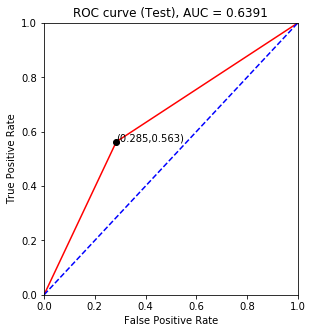

In [372]:
plot_ROC(y_test_final, y_pred)

In [373]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('NB SMOTE')

Datos balanceados submuestreando

In [374]:
gnb_4 =gnb.fit(X_under, y_under)
y_pred = gnb_4.predict(X_test_final)

In [375]:
pd.crosstab(y_test_final, y_pred)

col_0,0,1
row_0,,
0,3413,348
1,192,46


Test Accuracy: 0.8649662415603901 
Test AUC: 0.5503743640503262 
Test Confusion Matrix:

[[3413  348]
 [ 192   46]]

probabilibad de acierto clase 0: (90.747)
probabilibad de acierto clase 1: (19.328)


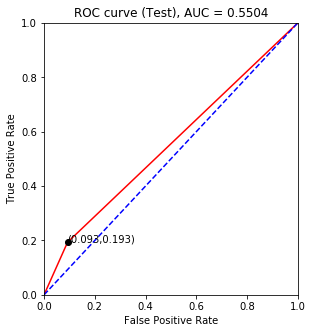

In [376]:
plot_ROC(y_test_final, y_pred)

In [377]:
F1_aux = f1_score(y_test_final, y_pred)
F1_TEST.append(F1_aux)
F1_NAMES.append('NB SUB')

### Deep learning

Vamos a realizar una comprobación de estos 4 modelos respecto del test auxiliar para medir su eficacia final.

In [441]:
df2 = pd.read_csv('./ticeval2000.txt', sep="\t")

In [442]:
X_test_final = df2.ix[:, 42:]

In [443]:
X_test_final.columns = ['MKOOPKLA','PWAPART','PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR',
                             'PWERKT','PBROM','PLEVEN', 'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART'
                             ,'AWABEDR','AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM',
                              'ALEVEN','APERSONG','AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND']

In [444]:
X_test_final = X_test_final[['MKOOPKLA','AWAPART','AFIETS','APERSAUT','ABYSTAND','ABROM','ALEVEN','ABRAND','APLEZIER']]

In [445]:
y_test_final = pd.read_csv('./tictgts2000.txt')

In [446]:
y_test_final = np.array(y_test_final['0'].tolist())

### Modelo 1

In [447]:
y_pred = model1.predict(X_test_final)

In [448]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [449]:
clasificaciones = np.array(clasificaciones)

In [450]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0
row_0,
0,3761
1,238


In [455]:
F1_aux = f1_score(y_test_final, clasificaciones)
F1_TEST.append(F1_aux)
F1_NAMES.append('DL MODELO1')

### Modelo 2

In [452]:
y_pred = model2.predict(X_test_final)

In [453]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.55:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [454]:
clasificaciones = np.array(clasificaciones)

In [389]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0,1
row_0,,
0,2877,884
1,118,120


In [391]:
F1_aux = f1_score(y_test_final, clasificaciones)
F1_TEST.append(F1_aux)
F1_NAMES.append('DL MODELO2')

### Modelo 3

In [392]:
y_pred = model3.predict(X_test_final)

In [393]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [394]:
clasificaciones = np.array(clasificaciones)

In [395]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0,1
row_0,,
0,2368,1393
1,88,150


In [396]:
F1_aux = f1_score(y_test_final, clasificaciones)
F1_TEST.append(F1_aux)
F1_NAMES.append('DL MODELO3')

### Modelo 4

In [397]:
y_pred = model4.predict(X_test_final)

In [398]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.5:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [399]:
clasificaciones = np.array(clasificaciones)

In [400]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0,1
row_0,,
0,3719,42
1,225,13


In [402]:
F1_aux = f1_score(y_test_final, clasificaciones)
F1_TEST.append(F1_aux)
F1_NAMES.append('DL MODELO4')

Los resultados obtenidos por los modelos 2 y 3 obtienen valores cercanos a los obtenidos por el mejor clasificacdor de los 
probados anteriormente, asi que creemos que partiendo de esta base se podria tener en cuenta la modelización de este modelo
mediante redes neuronales, auqneu no vamos a profundizar más en este tema.

La última prueba que se va a llevar a cabo es subir el valor del límite 0,5 que hemos fijado para decir que contrata el seguro.

#### 0.6

In [403]:
y_pred = model2.predict(X_test_final)

In [404]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.6:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [405]:
clasificaciones = np.array(clasificaciones)

In [406]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0,1
row_0,,
0,3052,709
1,124,114


Se reduce el número de detectados pero desciende en gran medida el número de misclasificados de la clase 0 en la 1.

#### 0.7

In [407]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.7:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [408]:
clasificaciones = np.array(clasificaciones)

In [409]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0,1
row_0,,
0,3424,337
1,175,63


El límite se ha subido demasiado y ya no encuentra un funcionamiento optimo.

#### 0.55 

In [410]:
clasificaciones = []
for i in y_pred:
    if i[0] > 0.55:
        clasificaciones.append(1)
    else:
        clasificaciones.append(0)

In [411]:
clasificaciones = np.array(clasificaciones)

In [412]:
pd.crosstab(y_test_final, clasificaciones)

col_0,0,1
row_0,,
0,2877,884
1,118,120


Con subir la barrera 0,5 hemos disminuido en 100 unidades el error en la clase 0 hacía la clase 1 y sólo hemos perdido 5 unidades de la clase 1 clasificadeas como clase 1, por tanto,
creemos que este sería un punto óptimo de operación.

In [413]:
from sklearn.metrics import f1_score

In [414]:
f1_score(y_test_final, clasificaciones)

0.1932367149758454

## Comparación global (F1_score) sobre los datos de test extra

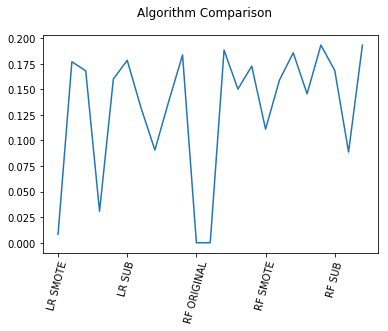

,F1_SCORE,MODEL
0,0.008230,LR ORIGINAL
1,0.176937,LR SMOTE
2,0.168086,LR SUB
3,0.030769,RF ORIGINAL
4,0.160128,RF SMOTE
5,0.178361,RF SUB
6,0.131805,KNN ORIGINAL
7,0.090615,KNN3 ORIGINAL
8,0.138249,KNN SMOTE
9,0.183575,KNN SUB


In [456]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.plot(F1_TEST)
ax.set_xticklabels(F1_NAMES, rotation=75)
plt.show()
RESUMEN = pd.DataFrame({'F1_SCORE':F1_TEST,'MODEL':F1_NAMES})
RESUMEN

In [457]:
RESUMEN.sort_values(by=['F1_SCORE'])

,F1_SCORE,MODEL
11,0.000000,SVM RBF ORIGINAL
10,0.000000,SVM LINEAL ORIGINAL
0,0.008230,LR ORIGINAL
3,0.030769,RF ORIGINAL
21,0.088737,DL MODELO4
7,0.090615,KNN3 ORIGINAL
15,0.111111,NB ORIGINAL
6,0.131805,KNN ORIGINAL
8,0.138249,KNN SMOTE
18,0.145570,NB SUB


# Conclusiones:

Despues de abordar el problema desde distintos puntos de vista, descubrimos que sorprendentemente la mejor solución para el mismo ra un SVM líneal con unos costes que reflejaran el desvalanceo entre las clases.

Cabe destacar que la arquitectura deep learning debe ser tomada en cuenta para la resolución del problema ya que nos ofrece un 
resultado un poco superior al de los obtenidos por las técnicas habituales.

En la mayoria de los modelos estudiados las distintas técnicas de reequilibrado del problema obtnienen mejores resultados 
en la mayoria de casos que abordar directamente el problema desequilibrado.